In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [24]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0
...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2


In [25]:
!pip install  torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:0000:01


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = combined_snli_df.drop(['True_Label'], axis=1).values
y_snli = combined_snli_df['True_Label'].values

# Features and Labels
X_mnli_matched = combined_mnli_matched_df.drop(['True_Label'], axis=1).values
y_mnli_matched = combined_mnli_matched_df['True_Label'].values

# Features and Labels
X_mnli_mismatched = combined_mnli_mismatched_df.drop(['True_Label'], axis=1).values
y_mnli_mismatched = combined_mnli_mismatched_df['True_Label'].values

# Features and Labels
X_anli_r1 = combined_anli_r1_df.drop(['True_Label'], axis=1).values
y_anli_r1 = combined_anli_r1_df['True_Label'].values

# Features and Labels
X_anli_r2 = combined_anli_r2_df.drop(['True_Label'], axis=1).values
y_anli_r2 = combined_anli_r2_df['True_Label'].values

# Features and Labels
X_anli_r3 = combined_anli_r3_df.drop(['True_Label'], axis=1).values
y_anli_r3 = combined_anli_r3_df['True_Label'].values


2024-04-22 16:22:23.156032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 16:22:23.156126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 16:22:23.277587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Function to create graph data
def create_graph(data, labels):
    num_nodes = data.shape[0]
    edge_index = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long)  # Self-loops as edges
    graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))
    return graph_data

# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.wait = 0
        self.stop_training = False

    def __call__(self, loss):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True

# Simple GCN Model
class SimpleGCN(torch.nn.Module):
    def __init__(self, input_dim):
        super(SimpleGCN, self).__init__()
        self.conv1 = GCNConv(input_dim, 32)  # Input to hidden layer
        self.conv2 = GCNConv(32, 3)  # Output layer for classification

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)  # Dropout
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [28]:
# Define plot_training_and_validation function
def plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    # Training and validation accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.legend()
    # Training and validation loss plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} - Training and Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Training and evaluation function with input dimension fix
def train_and_evaluate(train_data, test_data, name, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    input_dim = train_data.x.shape[1]  # Determine the input dimension
    model = SimpleGCN(input_dim)  # Instantiate model with correct input dimension
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # Learning rate and weight decay
    criterion = torch.nn.CrossEntropyLoss()  # Loss function

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience)

    # Variables for tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training with validation and early stopping
    for epoch in range(num_epochs):
        model.train()  # Set to training mode
        optimizer.zero_grad()  # Reset gradients
        out = model(train_data)  # Forward pass
        loss = criterion(out, train_data.y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_losses.append(loss.item())  # Store training loss

        # Calculate training accuracy
        train_pred = out.argmax(dim=1)  # Get predicted labels
        train_correct = (train_pred == train_data.y).sum().item()  # Correct predictions
        train_accuracy = train_correct / train_data.num_nodes
        train_accuracies.append(train_accuracy)

        # Validation
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            val_out = model(test_data)  # Forward pass for validation
            val_loss = criterion(val_out, test_data.y)  # Validation loss
            val_losses.append(val_loss.item())  # Store validation loss
            val_pred = val_out.argmax(dim=1)  # Get predicted labels
            val_correct = (val_pred == test_data.y).sum().item()  # Correct predictions
            val_accuracy = val_correct / test_data.num_nodes  # Validation accuracy
            val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Check for early stopping
        early_stopping(val_loss.item())
        if early_stopping.stop_training:
            print("Early stopping triggered")
            break

    # Final accuracy and loss on validation data
    final_val_loss = val_losses[-1]
    final_val_accuracy = val_accuracies[-1]

    print(f"Final Validation Loss on {name}: {final_val_loss:.4f}")
    print(f"Final Validation Accuracy on {name}: {final_val_accuracy:.4f}")

    # Plot training and validation curves
    plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, name)

    return model, final_val_loss, final_val_accuracy

Epoch 1/100, Train Loss: 1.2424, Val Loss: 1.1601, Val Accuracy: 0.3613
Epoch 2/100, Train Loss: 1.1881, Val Loss: 1.1043, Val Accuracy: 0.3623
Epoch 3/100, Train Loss: 1.1262, Val Loss: 1.0514, Val Accuracy: 0.3649
Epoch 4/100, Train Loss: 1.0761, Val Loss: 1.0014, Val Accuracy: 0.3705
Epoch 5/100, Train Loss: 1.0226, Val Loss: 0.9550, Val Accuracy: 0.3863
Epoch 6/100, Train Loss: 0.9807, Val Loss: 0.9111, Val Accuracy: 0.8341
Epoch 7/100, Train Loss: 0.9378, Val Loss: 0.8691, Val Accuracy: 0.8901
Epoch 8/100, Train Loss: 0.8914, Val Loss: 0.8288, Val Accuracy: 0.9089
Epoch 9/100, Train Loss: 0.8533, Val Loss: 0.7906, Val Accuracy: 0.9176
Epoch 10/100, Train Loss: 0.8140, Val Loss: 0.7539, Val Accuracy: 0.9206
Epoch 11/100, Train Loss: 0.7784, Val Loss: 0.7190, Val Accuracy: 0.9191
Epoch 12/100, Train Loss: 0.7448, Val Loss: 0.6855, Val Accuracy: 0.9211
Epoch 13/100, Train Loss: 0.7134, Val Loss: 0.6531, Val Accuracy: 0.9211
Epoch 14/100, Train Loss: 0.6800, Val Loss: 0.6219, Val Accu

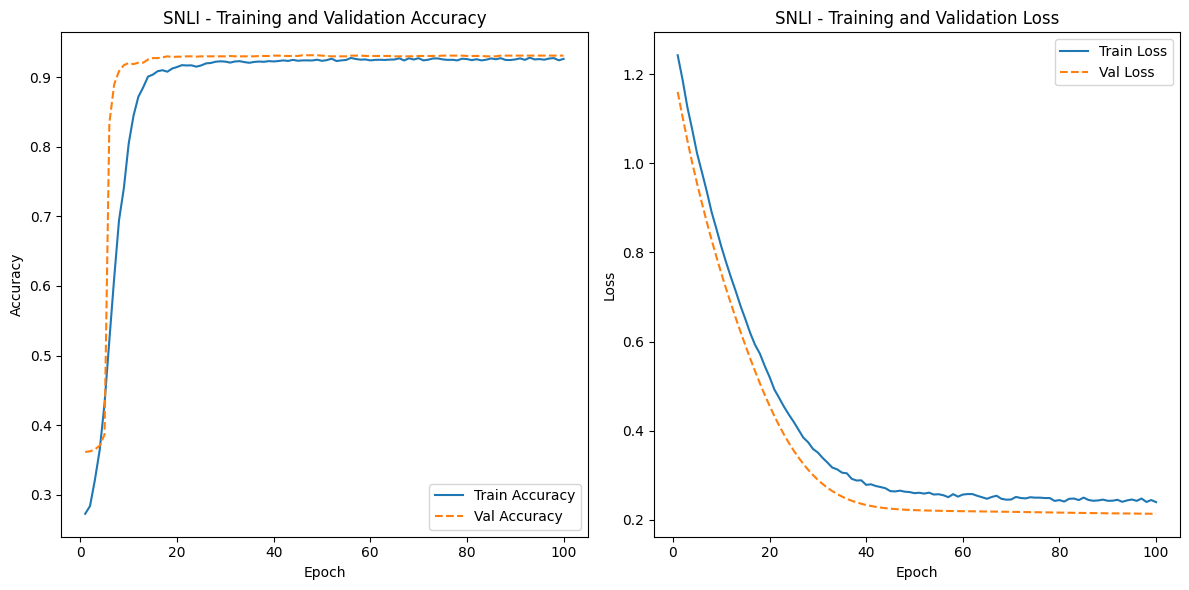

In [29]:
X_train_snli, X_test_snli, y_train_snli, y_test_snli = train_test_split(X_snli, y_snli, test_size=0.2, random_state=42)

# Create graph data for SNLI
train_graph_snli = create_graph(X_train_snli, y_train_snli)
test_graph_snli = create_graph(X_test_snli, y_test_snli)

# Call the function to train and evaluate for SNLI
model_snli, val_loss_snli, val_accuracy_snli = train_and_evaluate(
    train_graph_snli, test_graph_snli, 'SNLI'
)


Epoch 1/100, Train Loss: 1.0850, Val Loss: 1.0212, Val Accuracy: 0.6210
Epoch 2/100, Train Loss: 1.0271, Val Loss: 0.9697, Val Accuracy: 0.6220
Epoch 3/100, Train Loss: 0.9778, Val Loss: 0.9211, Val Accuracy: 0.6246
Epoch 4/100, Train Loss: 0.9316, Val Loss: 0.8747, Val Accuracy: 0.8120
Epoch 5/100, Train Loss: 0.8850, Val Loss: 0.8318, Val Accuracy: 0.9052
Epoch 6/100, Train Loss: 0.8421, Val Loss: 0.7906, Val Accuracy: 0.9134
Epoch 7/100, Train Loss: 0.8045, Val Loss: 0.7518, Val Accuracy: 0.9159
Epoch 8/100, Train Loss: 0.7634, Val Loss: 0.7157, Val Accuracy: 0.9195
Epoch 9/100, Train Loss: 0.7281, Val Loss: 0.6811, Val Accuracy: 0.9200
Epoch 10/100, Train Loss: 0.6962, Val Loss: 0.6480, Val Accuracy: 0.9205
Epoch 11/100, Train Loss: 0.6629, Val Loss: 0.6167, Val Accuracy: 0.9205
Epoch 12/100, Train Loss: 0.6318, Val Loss: 0.5866, Val Accuracy: 0.9195
Epoch 13/100, Train Loss: 0.6036, Val Loss: 0.5580, Val Accuracy: 0.9200
Epoch 14/100, Train Loss: 0.5797, Val Loss: 0.5306, Val Accu

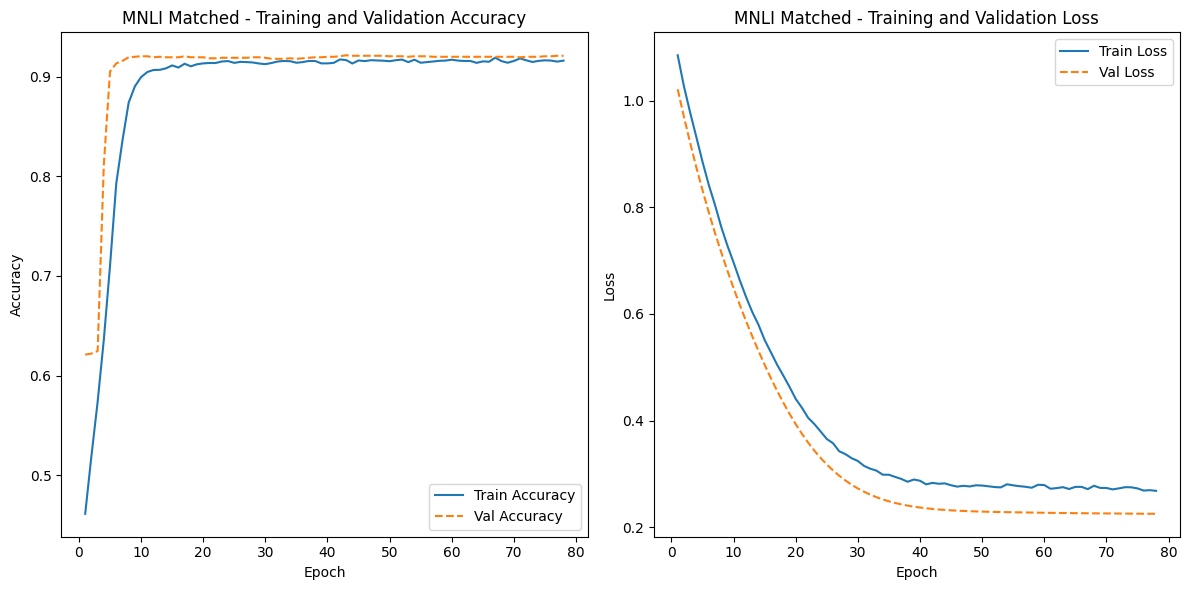

In [30]:
X_train_mnli_matched, X_test_mnli_matched, y_train_mnli_matched, y_test_mnli_matched = train_test_split(X_mnli_matched, y_mnli_matched, test_size=0.2, random_state=42)

# Create graph data for MNLI Matched
train_graph_mnli_matched = create_graph(X_train_mnli_matched, y_train_mnli_matched)
test_graph_mnli_matched = create_graph(X_test_mnli_matched, y_test_mnli_matched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_matched, val_loss_mnli_matched, val_accuracy_mnli_matched = train_and_evaluate(
    train_graph_mnli_matched, test_graph_mnli_matched, 'MNLI Matched'
)

Epoch 1/100, Train Loss: 1.1151, Val Loss: 1.0523, Val Accuracy: 0.6060
Epoch 2/100, Train Loss: 1.0664, Val Loss: 1.0058, Val Accuracy: 0.6065
Epoch 3/100, Train Loss: 1.0182, Val Loss: 0.9621, Val Accuracy: 0.6080
Epoch 4/100, Train Loss: 0.9747, Val Loss: 0.9212, Val Accuracy: 0.6080
Epoch 5/100, Train Loss: 0.9358, Val Loss: 0.8829, Val Accuracy: 0.6090
Epoch 6/100, Train Loss: 0.8981, Val Loss: 0.8473, Val Accuracy: 0.6085
Epoch 7/100, Train Loss: 0.8618, Val Loss: 0.8136, Val Accuracy: 0.6090
Epoch 8/100, Train Loss: 0.8276, Val Loss: 0.7819, Val Accuracy: 0.6090
Epoch 9/100, Train Loss: 0.7960, Val Loss: 0.7521, Val Accuracy: 0.6090
Epoch 10/100, Train Loss: 0.7669, Val Loss: 0.7238, Val Accuracy: 0.6090
Epoch 11/100, Train Loss: 0.7399, Val Loss: 0.6972, Val Accuracy: 0.6090
Epoch 12/100, Train Loss: 0.7127, Val Loss: 0.6721, Val Accuracy: 0.6090
Epoch 13/100, Train Loss: 0.6856, Val Loss: 0.6485, Val Accuracy: 0.6106
Epoch 14/100, Train Loss: 0.6625, Val Loss: 0.6262, Val Accu

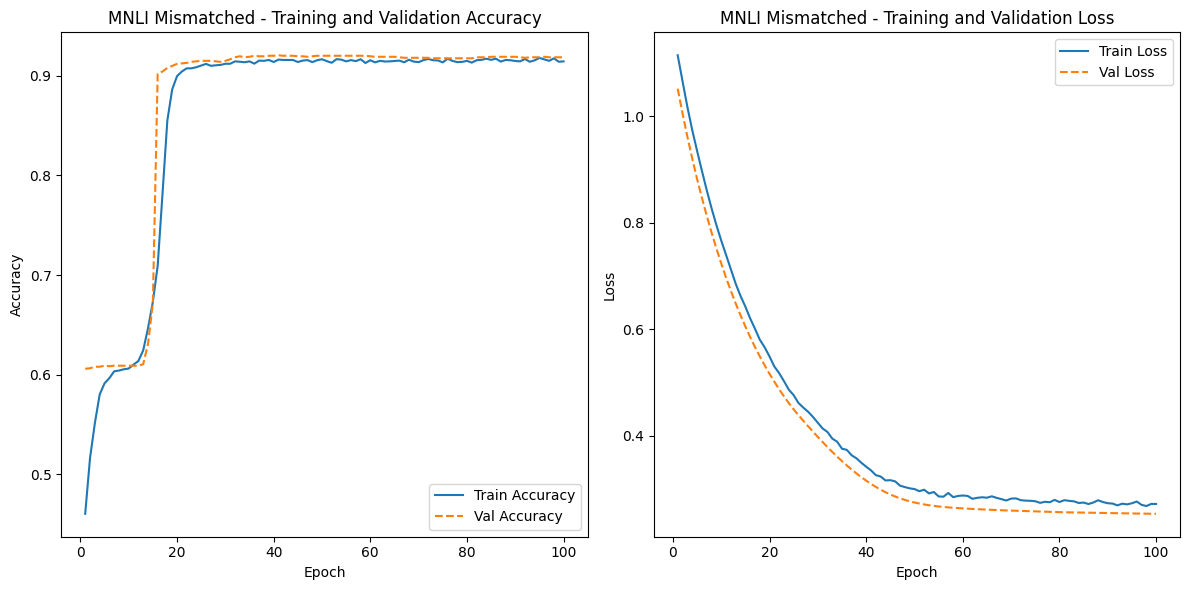

In [31]:
X_train_mnli_mismatched, X_test_mnli_mismatched, y_train_mnli_mismatched, y_test_mnli_mismatched = train_test_split(X_mnli_mismatched, y_mnli_mismatched, test_size=0.2, random_state=42)

# Create graph data for MNLI mismatched
train_graph_mnli_mismatched = create_graph(X_train_mnli_mismatched, y_train_mnli_mismatched)
test_graph_mnli_mismatched = create_graph(X_test_mnli_mismatched, y_test_mnli_mismatched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_mismatched, val_loss_mnli_mismatched, val_accuracy_mnli_mismatched = train_and_evaluate(
    train_graph_mnli_mismatched, test_graph_mnli_mismatched, 'MNLI Mismatched'
)

Epoch 1/100, Train Loss: 1.0506, Val Loss: 1.0152, Val Accuracy: 0.4900
Epoch 2/100, Train Loss: 1.0200, Val Loss: 0.9922, Val Accuracy: 0.5200
Epoch 3/100, Train Loss: 0.9953, Val Loss: 0.9705, Val Accuracy: 0.5550
Epoch 4/100, Train Loss: 0.9618, Val Loss: 0.9500, Val Accuracy: 0.5700
Epoch 5/100, Train Loss: 0.9409, Val Loss: 0.9305, Val Accuracy: 0.6050
Epoch 6/100, Train Loss: 0.9276, Val Loss: 0.9120, Val Accuracy: 0.6550
Epoch 7/100, Train Loss: 0.9019, Val Loss: 0.8942, Val Accuracy: 0.7050
Epoch 8/100, Train Loss: 0.8773, Val Loss: 0.8772, Val Accuracy: 0.7000
Epoch 9/100, Train Loss: 0.8590, Val Loss: 0.8611, Val Accuracy: 0.7000
Epoch 10/100, Train Loss: 0.8500, Val Loss: 0.8458, Val Accuracy: 0.7000
Epoch 11/100, Train Loss: 0.8355, Val Loss: 0.8313, Val Accuracy: 0.7000
Epoch 12/100, Train Loss: 0.8085, Val Loss: 0.8177, Val Accuracy: 0.6950
Epoch 13/100, Train Loss: 0.7911, Val Loss: 0.8050, Val Accuracy: 0.6900
Epoch 14/100, Train Loss: 0.7842, Val Loss: 0.7932, Val Accu

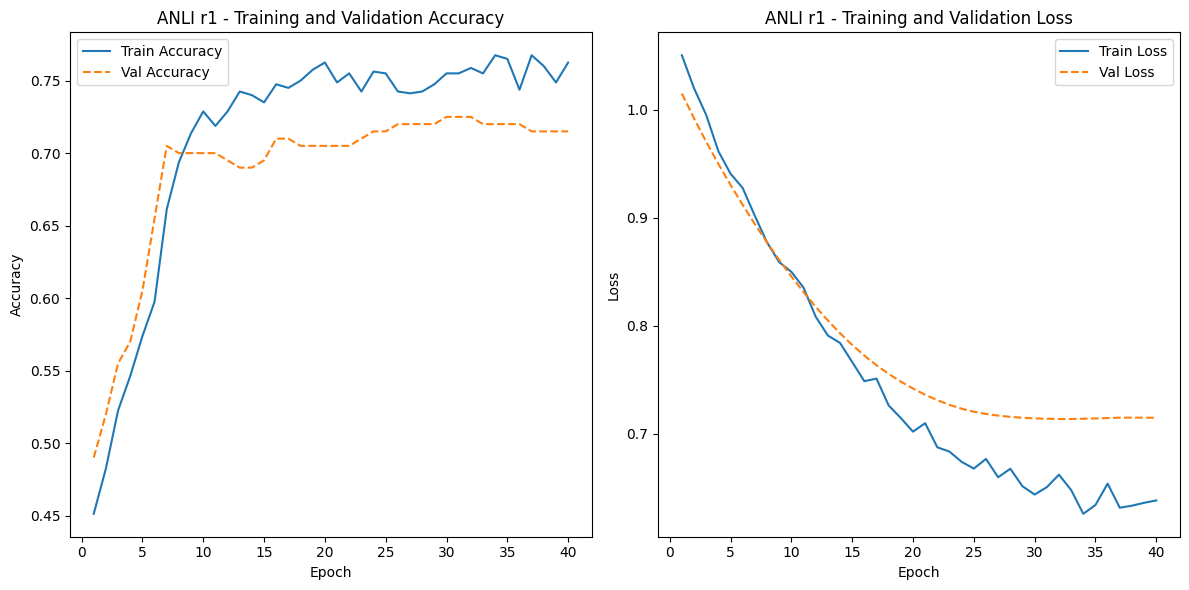

In [32]:
X_train_anli_r1, X_test_anli_r1, y_train_anli_r1, y_test_anli_r1 = train_test_split(X_anli_r1, y_anli_r1, test_size=0.2, random_state=42)

# Create graph data for ANLI r1
train_graph_anli_r1 = create_graph(X_train_anli_r1, y_train_anli_r1)
test_graph_anli_r1 = create_graph(X_test_anli_r1, y_test_anli_r1)

# Call the function to train and evaluate for ANLI r1
model_anli_r1, val_loss_anli_r1, val_accuracy_anli_r1 = train_and_evaluate(
    train_graph_anli_r1, test_graph_anli_r1, 'ANLI r1'
)

Epoch 1/100, Train Loss: 1.3905, Val Loss: 1.2802, Val Accuracy: 0.3600
Epoch 2/100, Train Loss: 1.3554, Val Loss: 1.2433, Val Accuracy: 0.3600
Epoch 3/100, Train Loss: 1.3091, Val Loss: 1.2105, Val Accuracy: 0.3600
Epoch 4/100, Train Loss: 1.2496, Val Loss: 1.1812, Val Accuracy: 0.3600
Epoch 5/100, Train Loss: 1.2299, Val Loss: 1.1544, Val Accuracy: 0.3650
Epoch 6/100, Train Loss: 1.1929, Val Loss: 1.1300, Val Accuracy: 0.3600
Epoch 7/100, Train Loss: 1.1605, Val Loss: 1.1071, Val Accuracy: 0.3800
Epoch 8/100, Train Loss: 1.1304, Val Loss: 1.0858, Val Accuracy: 0.4300
Epoch 9/100, Train Loss: 1.1204, Val Loss: 1.0653, Val Accuracy: 0.4500
Epoch 10/100, Train Loss: 1.0891, Val Loss: 1.0456, Val Accuracy: 0.4600
Epoch 11/100, Train Loss: 1.0705, Val Loss: 1.0265, Val Accuracy: 0.4800
Epoch 12/100, Train Loss: 1.0482, Val Loss: 1.0079, Val Accuracy: 0.5350
Epoch 13/100, Train Loss: 1.0416, Val Loss: 0.9899, Val Accuracy: 0.6700
Epoch 14/100, Train Loss: 1.0263, Val Loss: 0.9724, Val Accu

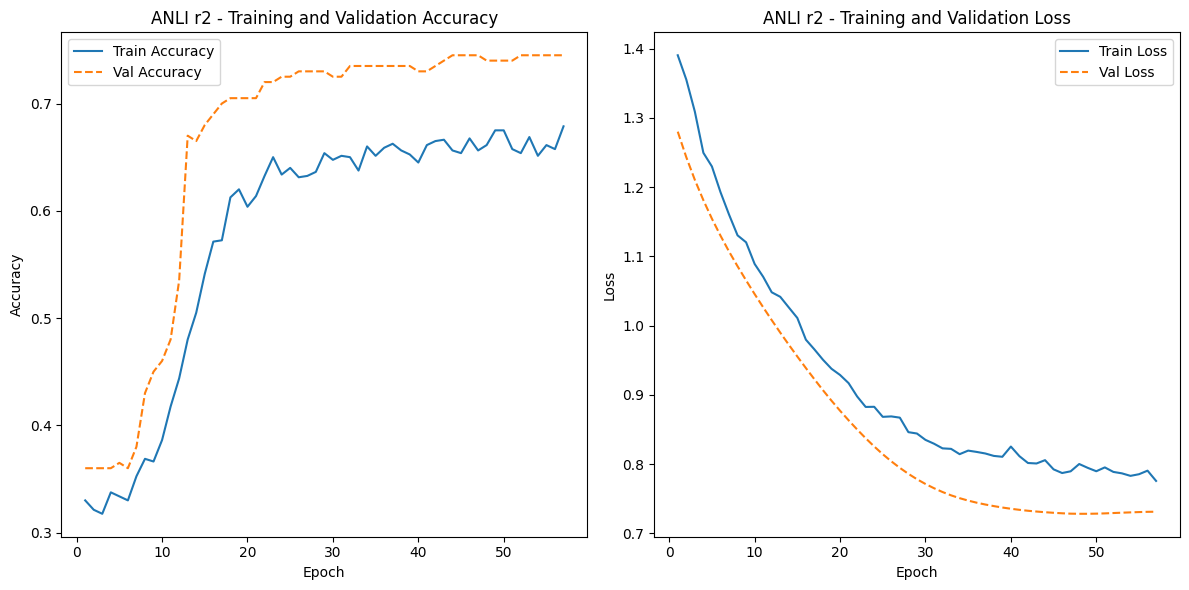

In [33]:
X_train_anli_r2, X_test_anli_r2, y_train_anli_r2, y_test_anli_r2 = train_test_split(X_anli_r2, y_anli_r2, test_size=0.2, random_state=42)

# Create graph data for ANLI r2
train_graph_anli_r2 = create_graph(X_train_anli_r2, y_train_anli_r2)
test_graph_anli_r2 = create_graph(X_test_anli_r2, y_test_anli_r2)

# Call the function to train and evaluate for ANLI r2
model_anli_r2, val_loss_anli_r2, val_accuracy_anli_r2 = train_and_evaluate(
    train_graph_anli_r2, test_graph_anli_r2, 'ANLI r2'
)

Epoch 1/100, Train Loss: 1.1260, Val Loss: 1.0822, Val Accuracy: 0.3833
Epoch 2/100, Train Loss: 1.1052, Val Loss: 1.0535, Val Accuracy: 0.5708
Epoch 3/100, Train Loss: 1.0758, Val Loss: 1.0259, Val Accuracy: 0.6292
Epoch 4/100, Train Loss: 1.0507, Val Loss: 0.9991, Val Accuracy: 0.6625
Epoch 5/100, Train Loss: 1.0261, Val Loss: 0.9733, Val Accuracy: 0.6667
Epoch 6/100, Train Loss: 1.0065, Val Loss: 0.9487, Val Accuracy: 0.6750
Epoch 7/100, Train Loss: 0.9844, Val Loss: 0.9250, Val Accuracy: 0.6833
Epoch 8/100, Train Loss: 0.9660, Val Loss: 0.9024, Val Accuracy: 0.6917
Epoch 9/100, Train Loss: 0.9546, Val Loss: 0.8810, Val Accuracy: 0.6792
Epoch 10/100, Train Loss: 0.9392, Val Loss: 0.8608, Val Accuracy: 0.6750
Epoch 11/100, Train Loss: 0.9210, Val Loss: 0.8419, Val Accuracy: 0.6917
Epoch 12/100, Train Loss: 0.9016, Val Loss: 0.8243, Val Accuracy: 0.6917
Epoch 13/100, Train Loss: 0.8831, Val Loss: 0.8080, Val Accuracy: 0.6958
Epoch 14/100, Train Loss: 0.8861, Val Loss: 0.7928, Val Accu

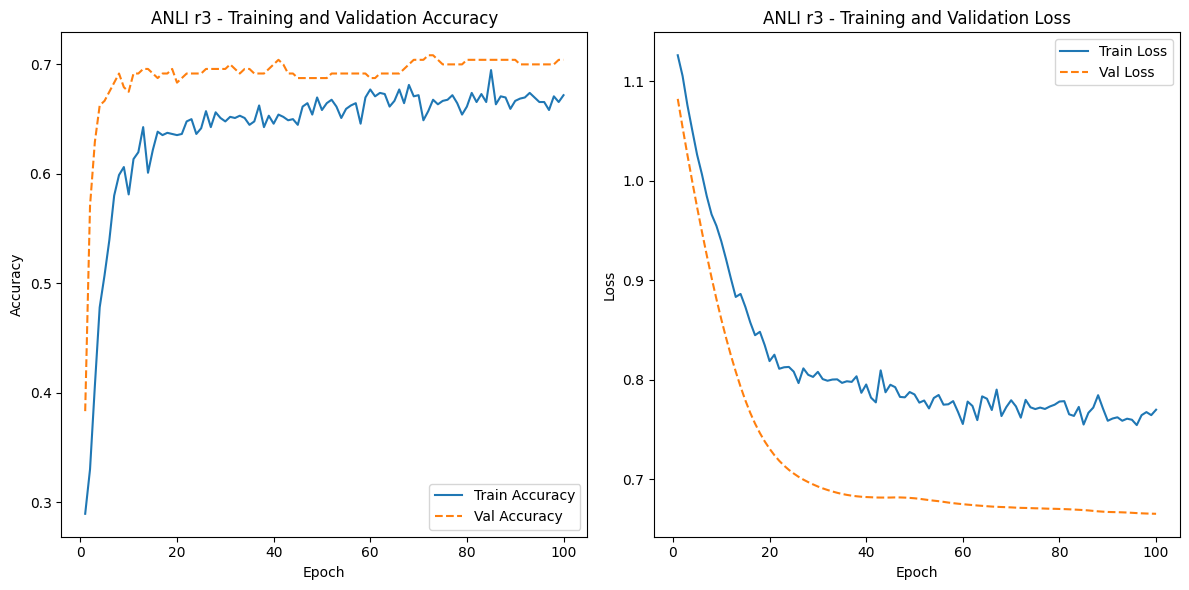

In [34]:
X_train_anli_r3, X_test_anli_r3, y_train_anli_r3, y_test_anli_r3 = train_test_split(X_anli_r3, y_anli_r3, test_size=0.2, random_state=42)

# Create graph data for ANLI r3
train_graph_anli_r3 = create_graph(X_train_anli_r3, y_train_anli_r3)
test_graph_anli_r3 = create_graph(X_test_anli_r3, y_test_anli_r3)

# Call the function to train and evaluate for ANLI r3
model_anli_r3, val_loss_anli_r3, val_accuracy_anli_r3 = train_and_evaluate(
    train_graph_anli_r3, test_graph_anli_r3, 'ANLI r3'
)

/tmp/ipykernel_34/3613549310.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 1/100, Train Loss: 1.3389, Val Loss: 1.2660, Val Accuracy: 0.0624
Epoch 2/100, Train Loss: 1.2790, Val Loss: 1.2110, Val Accuracy: 0.0678
Epoch 3/100, Train Loss: 1.2251, Val Loss: 1.1584, Val Accuracy: 0.0730
Epoch 4/100, Train Loss: 1.1734, Val Loss: 1.1079, Val Accuracy: 0.0872
Epoch 5/100, Train Loss: 1.1223, Val Loss: 1.0598, Val Accuracy: 0.1045
Epoch 6/100, Train Loss: 1.0731, Val Loss: 1.0142, Val Accuracy: 0.3692
Epoch 7/100, Train Loss: 1.0286, Val Loss: 0.9711, Val Accuracy: 0.6526
Epoch 8/100, Train Loss: 0.9855, Val Loss: 0.9300, Val Accuracy: 0.6788
Epoch 9/100, Train Loss: 0.9462, Val Loss: 0.8915, Val Accuracy: 0.7617
Epoch 10/100, Train Loss: 0.9092, Val Loss: 0.8552, Val Accuracy: 0.8797
Epoch 11/100, Train Loss: 0.8716, Val Loss: 0.8207, Val Accuracy: 0.8863
Epoch 12/100, Train Loss: 0.8394, Val Loss: 0.7877, Val Accuracy: 0.8894
Epoch 13/100, Train Loss: 0.8070, Val Loss: 0.7562, Val Accuracy: 0.8894
Epoch 14/100, Train Loss: 0.7772, Val Loss: 0.7261, Val Accu

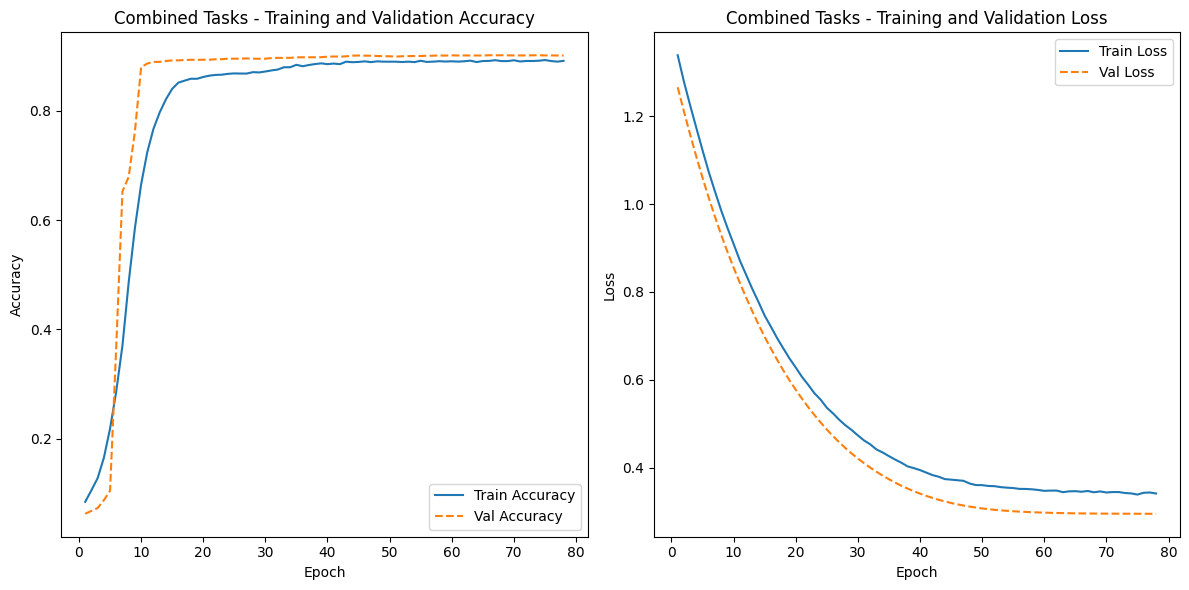

In [35]:
import torch

# Convert NumPy arrays to PyTorch tensors
X_train_snli_tensor = torch.tensor(X_train_snli)
X_train_mnli_matched_tensor = torch.tensor(X_train_mnli_matched)
X_train_mnli_mismatched_tensor = torch.tensor(X_train_mnli_mismatched)
X_train_anli_r1_tensor = torch.tensor(X_train_anli_r1)
X_train_anli_r2_tensor = torch.tensor(X_train_anli_r2)
X_train_anli_r3_tensor = torch.tensor(X_train_anli_r3)

y_train_snli_tensor = torch.tensor(y_train_snli)
y_train_mnli_matched_tensor = torch.tensor(y_train_mnli_matched)
y_train_mnli_mismatched_tensor = torch.tensor(y_train_mnli_mismatched)
y_train_anli_r1_tensor = torch.tensor(y_train_anli_r1)
y_train_anli_r2_tensor = torch.tensor(y_train_anli_r2)
y_train_anli_r3_tensor = torch.tensor(y_train_anli_r3)

# Concatenate X_train and y_train for all tasks
X_train_all = torch.cat([X_train_snli_tensor, X_train_mnli_matched_tensor, X_train_mnli_mismatched_tensor, X_train_anli_r1_tensor, X_train_anli_r2_tensor, X_train_anli_r3_tensor], dim=0)
y_train_all = torch.cat([y_train_snli_tensor, y_train_mnli_matched_tensor, y_train_mnli_mismatched_tensor, y_train_anli_r1_tensor, y_train_anli_r2_tensor, y_train_anli_r3_tensor], dim=0)

# Convert NumPy arrays to PyTorch tensors for test data
X_test_snli_tensor = torch.tensor(X_test_snli)
X_test_mnli_matched_tensor = torch.tensor(X_test_mnli_matched)
X_test_mnli_mismatched_tensor = torch.tensor(X_test_mnli_mismatched)
X_test_anli_r1_tensor = torch.tensor(X_test_anli_r1)
X_test_anli_r2_tensor = torch.tensor(X_test_anli_r2)
X_test_anli_r3_tensor = torch.tensor(X_test_anli_r3)

y_test_snli_tensor = torch.tensor(y_test_snli)
y_test_mnli_matched_tensor = torch.tensor(y_test_mnli_matched)
y_test_mnli_mismatched_tensor = torch.tensor(y_test_mnli_mismatched)
y_test_anli_r1_tensor = torch.tensor(y_test_anli_r1)
y_test_anli_r2_tensor = torch.tensor(y_test_anli_r2)
y_test_anli_r3_tensor = torch.tensor(y_test_anli_r3)

# Concatenate X_test and y_test for all tasks
X_test_all = torch.cat([X_test_snli_tensor, X_test_mnli_matched_tensor, X_test_mnli_mismatched_tensor, X_test_anli_r1_tensor, X_test_anli_r2_tensor, X_test_anli_r3_tensor], dim=0)
y_test_all = torch.cat([y_test_snli_tensor, y_test_mnli_matched_tensor, y_test_mnli_mismatched_tensor, y_test_anli_r1_tensor, y_test_anli_r2_tensor, y_test_anli_r3_tensor], dim=0)

# Create graph data for ALL combined data
train_graph_all = create_graph(X_train_all, y_train_all)
test_graph_all = create_graph(X_test_all, y_test_all)

# Train and evaluate the model on the combined dataset
model_all, final_val_loss_all, final_val_accuracy_all = train_and_evaluate(
    train_graph_all, test_graph_all, 'Combined Tasks'
)


In [46]:
# Specify the file path where you want to save the model
model_save_path = "/kaggle/working/GCN_simple_ensemble.h5"

# Save the model
torch.save(model_all.state_dict(), model_save_path)

print(f"Model saved successfully at: {model_save_path}")


Model saved successfully at: /kaggle/working/GCN_simple_ensemble.h5


In [37]:
from sklearn.model_selection import KFold
import numpy as np

def cross_validate(task_name, X_train, y_train, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    # Define the number of folds
    k = 5

    # Initialize lists to store evaluation metrics for each fold
    val_losses = []
    val_accuracies = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=k, shuffle=True)

    # Iterate through each fold
    for fold_idx, (train_indices, val_indices) in enumerate(kf.split(X_train)):
        # Extract the train and validation data for this fold
        X_train_fold = X_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_val_fold = X_train[val_indices]
        y_val_fold = y_train[val_indices]
        
        # Create graph data for this fold
        train_graph_fold = create_graph(X_train_fold, y_train_fold)
        val_graph_fold = create_graph(X_val_fold, y_val_fold)
        
        # Train and evaluate the model on this fold
        _, val_loss_fold, val_accuracy_fold = train_and_evaluate(
            train_graph_fold, val_graph_fold, f'{task_name} Fold {fold_idx + 1}',
            num_epochs=num_epochs, patience=patience,
            learning_rate=learning_rate, weight_decay=weight_decay
        )
        
        # Record the evaluation metrics for this fold
        val_losses.append(val_loss_fold)
        val_accuracies.append(val_accuracy_fold)

    # Calculate the average evaluation metrics over all folds
    avg_val_loss = np.mean(val_losses)
    avg_val_accuracy = np.mean(val_accuracies)

    print(f"Average Validation Loss for {task_name} across {k} folds: {avg_val_loss:.4f}")
    print(f"Average Validation Accuracy for {task_name} across {k} folds: {avg_val_accuracy:.4f}")

    return avg_val_loss, avg_val_accuracy


Epoch 1/100, Train Loss: 1.0688, Val Loss: 1.0009, Val Accuracy: 0.6056
Epoch 2/100, Train Loss: 1.0141, Val Loss: 0.9525, Val Accuracy: 0.6164
Epoch 3/100, Train Loss: 0.9669, Val Loss: 0.9057, Val Accuracy: 0.6221
Epoch 4/100, Train Loss: 0.9224, Val Loss: 0.8610, Val Accuracy: 0.6215
Epoch 5/100, Train Loss: 0.8851, Val Loss: 0.8178, Val Accuracy: 0.6272
Epoch 6/100, Train Loss: 0.8339, Val Loss: 0.7761, Val Accuracy: 0.9008
Epoch 7/100, Train Loss: 0.7987, Val Loss: 0.7359, Val Accuracy: 0.9103
Epoch 8/100, Train Loss: 0.7567, Val Loss: 0.6974, Val Accuracy: 0.9141
Epoch 9/100, Train Loss: 0.7196, Val Loss: 0.6614, Val Accuracy: 0.9154
Epoch 10/100, Train Loss: 0.6811, Val Loss: 0.6269, Val Accuracy: 0.9186
Epoch 11/100, Train Loss: 0.6500, Val Loss: 0.5941, Val Accuracy: 0.9192
Epoch 12/100, Train Loss: 0.6180, Val Loss: 0.5630, Val Accuracy: 0.9205
Epoch 13/100, Train Loss: 0.5906, Val Loss: 0.5335, Val Accuracy: 0.9218
Epoch 14/100, Train Loss: 0.5610, Val Loss: 0.5059, Val Accu

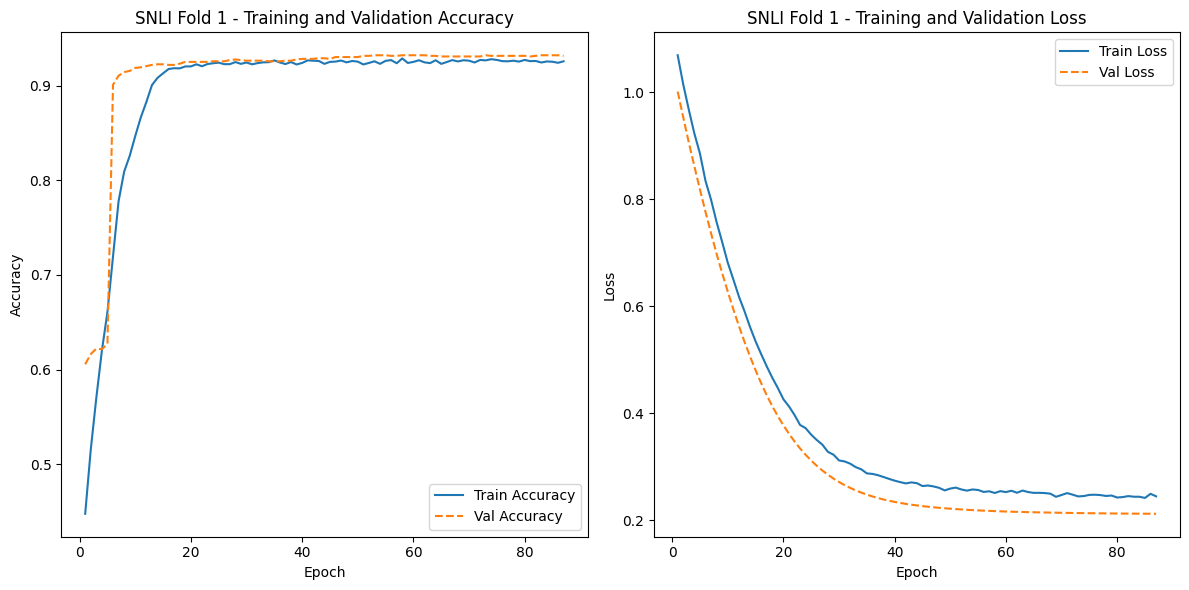

Epoch 1/100, Train Loss: 1.1880, Val Loss: 1.1230, Val Accuracy: 0.3193
Epoch 2/100, Train Loss: 1.1332, Val Loss: 1.0672, Val Accuracy: 0.3206
Epoch 3/100, Train Loss: 1.0820, Val Loss: 1.0148, Val Accuracy: 0.3212
Epoch 4/100, Train Loss: 1.0284, Val Loss: 0.9657, Val Accuracy: 0.3251
Epoch 5/100, Train Loss: 0.9774, Val Loss: 0.9187, Val Accuracy: 0.3397
Epoch 6/100, Train Loss: 0.9318, Val Loss: 0.8736, Val Accuracy: 0.8212
Epoch 7/100, Train Loss: 0.8885, Val Loss: 0.8308, Val Accuracy: 0.9059
Epoch 8/100, Train Loss: 0.8527, Val Loss: 0.7899, Val Accuracy: 0.9167
Epoch 9/100, Train Loss: 0.8136, Val Loss: 0.7509, Val Accuracy: 0.9211
Epoch 10/100, Train Loss: 0.7745, Val Loss: 0.7138, Val Accuracy: 0.9262
Epoch 11/100, Train Loss: 0.7387, Val Loss: 0.6787, Val Accuracy: 0.9288
Epoch 12/100, Train Loss: 0.7054, Val Loss: 0.6453, Val Accuracy: 0.9294
Epoch 13/100, Train Loss: 0.6748, Val Loss: 0.6137, Val Accuracy: 0.9294
Epoch 14/100, Train Loss: 0.6438, Val Loss: 0.5837, Val Accu

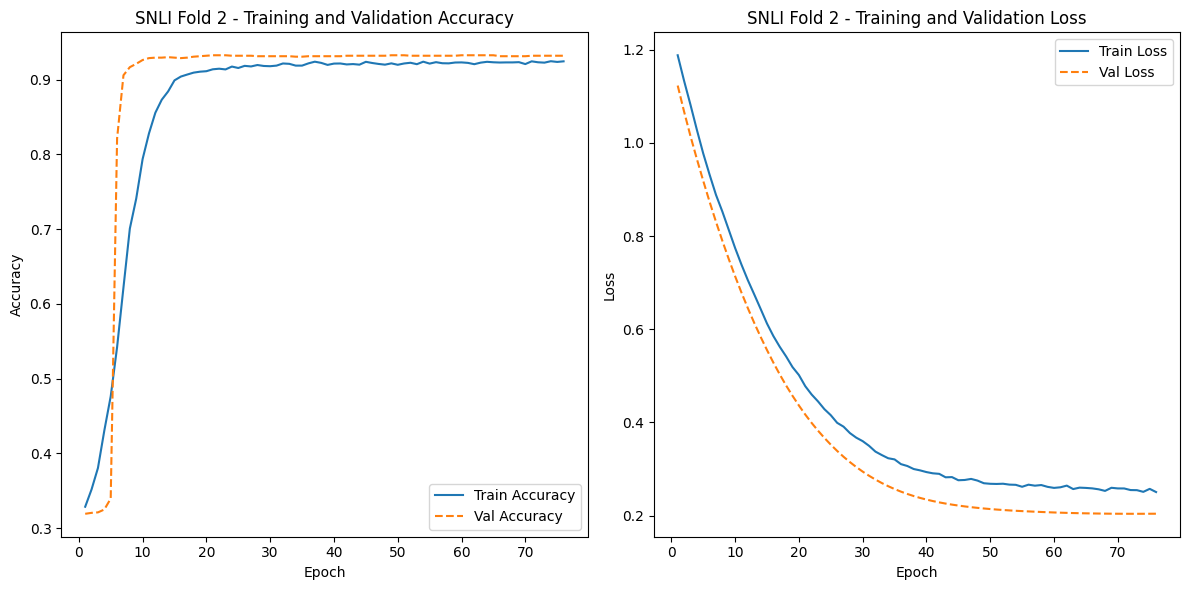

Epoch 1/100, Train Loss: 1.3122, Val Loss: 1.2293, Val Accuracy: 0.1037
Epoch 2/100, Train Loss: 1.2457, Val Loss: 1.1685, Val Accuracy: 0.2385
Epoch 3/100, Train Loss: 1.1833, Val Loss: 1.1119, Val Accuracy: 0.5884
Epoch 4/100, Train Loss: 1.1266, Val Loss: 1.0591, Val Accuracy: 0.6037
Epoch 5/100, Train Loss: 1.0709, Val Loss: 1.0095, Val Accuracy: 0.6094
Epoch 6/100, Train Loss: 1.0229, Val Loss: 0.9635, Val Accuracy: 0.6145
Epoch 7/100, Train Loss: 0.9733, Val Loss: 0.9210, Val Accuracy: 0.6151
Epoch 8/100, Train Loss: 0.9298, Val Loss: 0.8811, Val Accuracy: 0.6164
Epoch 9/100, Train Loss: 0.8902, Val Loss: 0.8437, Val Accuracy: 0.6177
Epoch 10/100, Train Loss: 0.8546, Val Loss: 0.8086, Val Accuracy: 0.6209
Epoch 11/100, Train Loss: 0.8197, Val Loss: 0.7754, Val Accuracy: 0.6463
Epoch 12/100, Train Loss: 0.7858, Val Loss: 0.7440, Val Accuracy: 0.8899
Epoch 13/100, Train Loss: 0.7555, Val Loss: 0.7144, Val Accuracy: 0.8944
Epoch 14/100, Train Loss: 0.7278, Val Loss: 0.6865, Val Accu

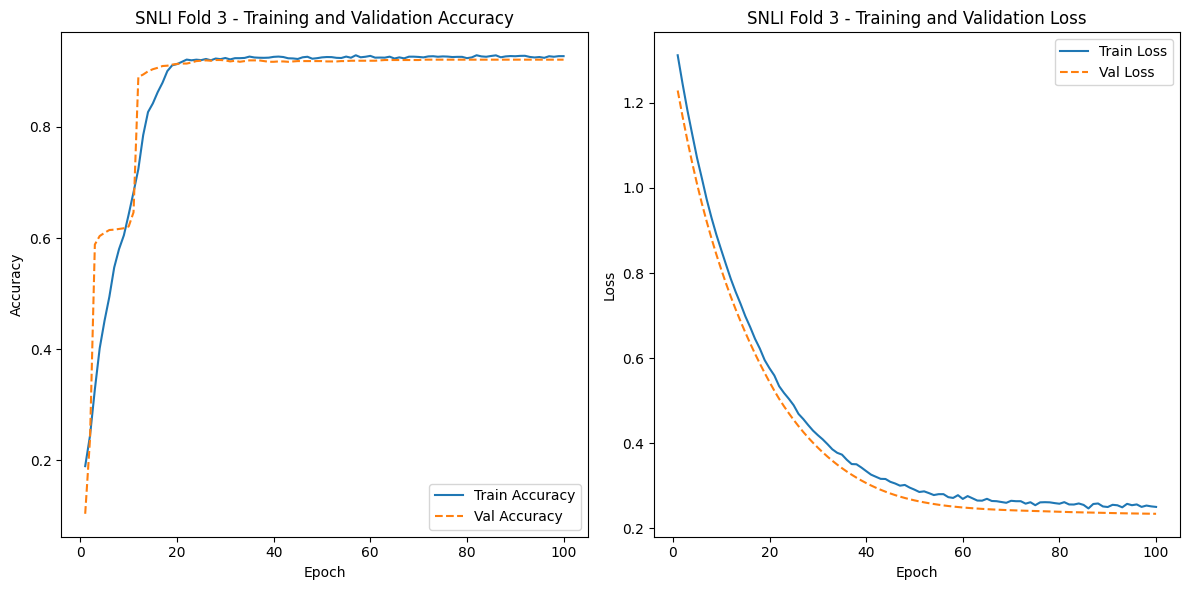

Epoch 1/100, Train Loss: 1.1659, Val Loss: 1.0855, Val Accuracy: 0.5897
Epoch 2/100, Train Loss: 1.1047, Val Loss: 1.0261, Val Accuracy: 0.5973
Epoch 3/100, Train Loss: 1.0437, Val Loss: 0.9699, Val Accuracy: 0.6037
Epoch 4/100, Train Loss: 0.9892, Val Loss: 0.9163, Val Accuracy: 0.6088
Epoch 5/100, Train Loss: 0.9397, Val Loss: 0.8650, Val Accuracy: 0.6132
Epoch 6/100, Train Loss: 0.8803, Val Loss: 0.8160, Val Accuracy: 0.6190
Epoch 7/100, Train Loss: 0.8338, Val Loss: 0.7694, Val Accuracy: 0.6349
Epoch 8/100, Train Loss: 0.7889, Val Loss: 0.7252, Val Accuracy: 0.9052
Epoch 9/100, Train Loss: 0.7435, Val Loss: 0.6843, Val Accuracy: 0.9128
Epoch 10/100, Train Loss: 0.7028, Val Loss: 0.6459, Val Accuracy: 0.9160
Epoch 11/100, Train Loss: 0.6681, Val Loss: 0.6099, Val Accuracy: 0.9179
Epoch 12/100, Train Loss: 0.6286, Val Loss: 0.5762, Val Accuracy: 0.9173
Epoch 13/100, Train Loss: 0.5942, Val Loss: 0.5448, Val Accuracy: 0.9167
Epoch 14/100, Train Loss: 0.5616, Val Loss: 0.5154, Val Accu

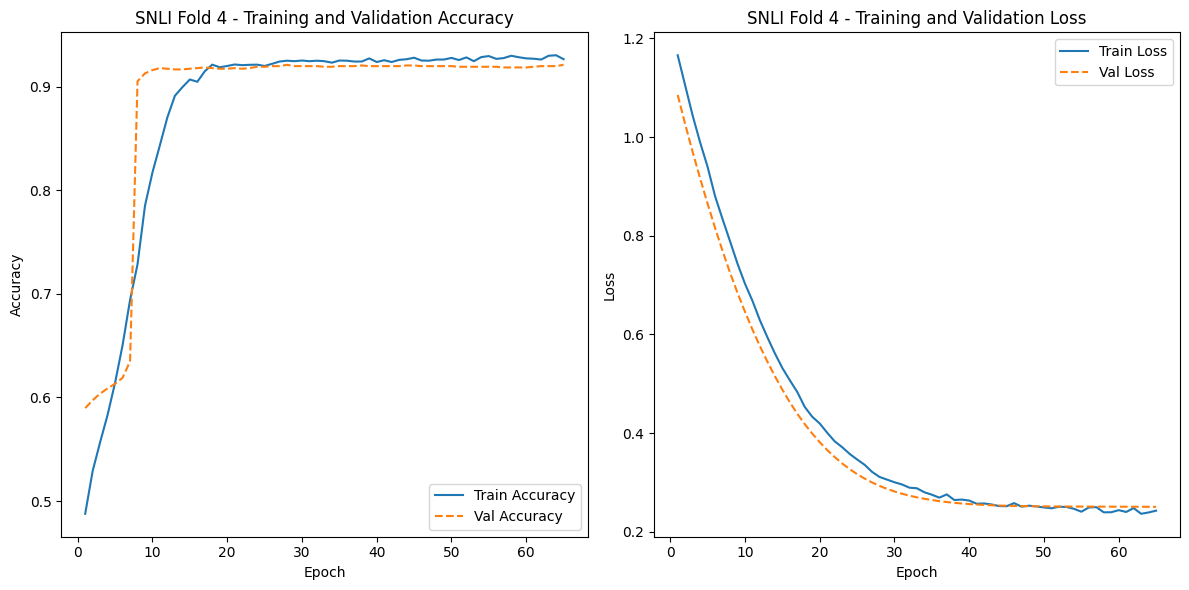

Epoch 1/100, Train Loss: 1.2658, Val Loss: 1.1876, Val Accuracy: 0.3195
Epoch 2/100, Train Loss: 1.1989, Val Loss: 1.1275, Val Accuracy: 0.5742
Epoch 3/100, Train Loss: 1.1332, Val Loss: 1.0706, Val Accuracy: 0.6022
Epoch 4/100, Train Loss: 1.0862, Val Loss: 1.0167, Val Accuracy: 0.6079
Epoch 5/100, Train Loss: 1.0262, Val Loss: 0.9663, Val Accuracy: 0.6098
Epoch 6/100, Train Loss: 0.9774, Val Loss: 0.9189, Val Accuracy: 0.6283
Epoch 7/100, Train Loss: 0.9299, Val Loss: 0.8743, Val Accuracy: 0.9032
Epoch 8/100, Train Loss: 0.8934, Val Loss: 0.8329, Val Accuracy: 0.9141
Epoch 9/100, Train Loss: 0.8495, Val Loss: 0.7933, Val Accuracy: 0.9192
Epoch 10/100, Train Loss: 0.8111, Val Loss: 0.7556, Val Accuracy: 0.9223
Epoch 11/100, Train Loss: 0.7693, Val Loss: 0.7196, Val Accuracy: 0.9236
Epoch 12/100, Train Loss: 0.7348, Val Loss: 0.6853, Val Accuracy: 0.9236
Epoch 13/100, Train Loss: 0.7041, Val Loss: 0.6528, Val Accuracy: 0.9236
Epoch 14/100, Train Loss: 0.6739, Val Loss: 0.6219, Val Accu

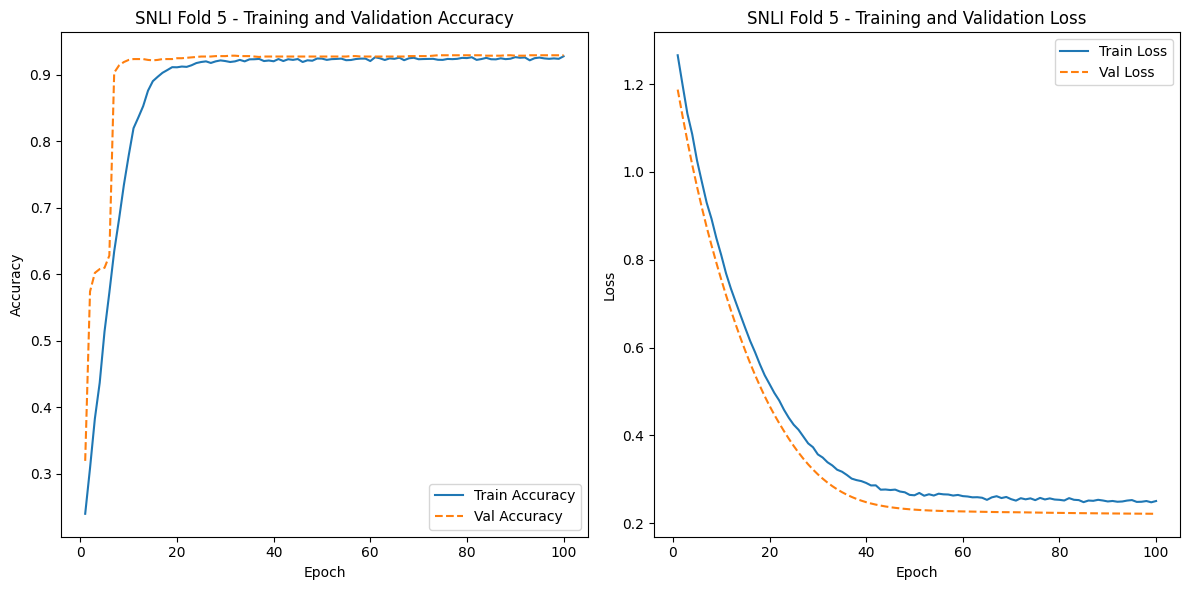

Average Validation Loss for SNLI across 5 folds: 0.2243
Average Validation Accuracy for SNLI across 5 folds: 0.9270


In [38]:
task_name = 'SNLI'
X_train = X_train_snli
y_train = y_train_snli
avg_val_loss_snli, avg_val_accuracy_snli = cross_validate(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.1457, Val Loss: 1.0674, Val Accuracy: 0.5850
Epoch 2/100, Train Loss: 1.0846, Val Loss: 1.0127, Val Accuracy: 0.5964
Epoch 3/100, Train Loss: 1.0313, Val Loss: 0.9601, Val Accuracy: 0.5996
Epoch 4/100, Train Loss: 0.9747, Val Loss: 0.9097, Val Accuracy: 0.6022
Epoch 5/100, Train Loss: 0.9263, Val Loss: 0.8617, Val Accuracy: 0.6060
Epoch 6/100, Train Loss: 0.8833, Val Loss: 0.8163, Val Accuracy: 0.6098
Epoch 7/100, Train Loss: 0.8370, Val Loss: 0.7730, Val Accuracy: 0.6187
Epoch 8/100, Train Loss: 0.7979, Val Loss: 0.7319, Val Accuracy: 0.8657
Epoch 9/100, Train Loss: 0.7564, Val Loss: 0.6929, Val Accuracy: 0.8912
Epoch 10/100, Train Loss: 0.7146, Val Loss: 0.6561, Val Accuracy: 0.8988
Epoch 11/100, Train Loss: 0.6792, Val Loss: 0.6215, Val Accuracy: 0.9013
Epoch 12/100, Train Loss: 0.6469, Val Loss: 0.5901, Val Accuracy: 0.9026
Epoch 13/100, Train Loss: 0.6119, Val Loss: 0.5606, Val Accuracy: 0.9052
Epoch 14/100, Train Loss: 0.5800, Val Loss: 0.5330, Val Accu

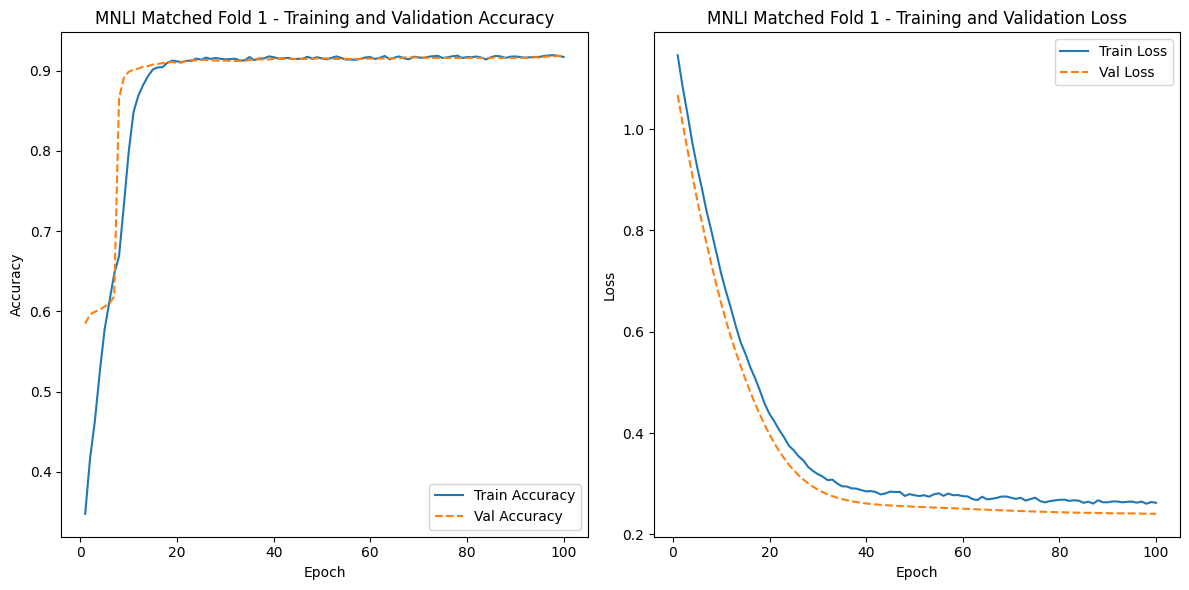

Epoch 1/100, Train Loss: 1.1379, Val Loss: 1.0843, Val Accuracy: 0.0624
Epoch 2/100, Train Loss: 1.0959, Val Loss: 1.0401, Val Accuracy: 0.2311
Epoch 3/100, Train Loss: 1.0533, Val Loss: 0.9961, Val Accuracy: 0.6098
Epoch 4/100, Train Loss: 1.0104, Val Loss: 0.9528, Val Accuracy: 0.8517
Epoch 5/100, Train Loss: 0.9667, Val Loss: 0.9102, Val Accuracy: 0.8937
Epoch 6/100, Train Loss: 0.9271, Val Loss: 0.8682, Val Accuracy: 0.9026
Epoch 7/100, Train Loss: 0.8844, Val Loss: 0.8264, Val Accuracy: 0.9115
Epoch 8/100, Train Loss: 0.8456, Val Loss: 0.7852, Val Accuracy: 0.9166
Epoch 9/100, Train Loss: 0.8070, Val Loss: 0.7450, Val Accuracy: 0.9179
Epoch 10/100, Train Loss: 0.7672, Val Loss: 0.7058, Val Accuracy: 0.9198
Epoch 11/100, Train Loss: 0.7306, Val Loss: 0.6678, Val Accuracy: 0.9204
Epoch 12/100, Train Loss: 0.6903, Val Loss: 0.6310, Val Accuracy: 0.9217
Epoch 13/100, Train Loss: 0.6577, Val Loss: 0.5956, Val Accuracy: 0.9217
Epoch 14/100, Train Loss: 0.6196, Val Loss: 0.5617, Val Accu

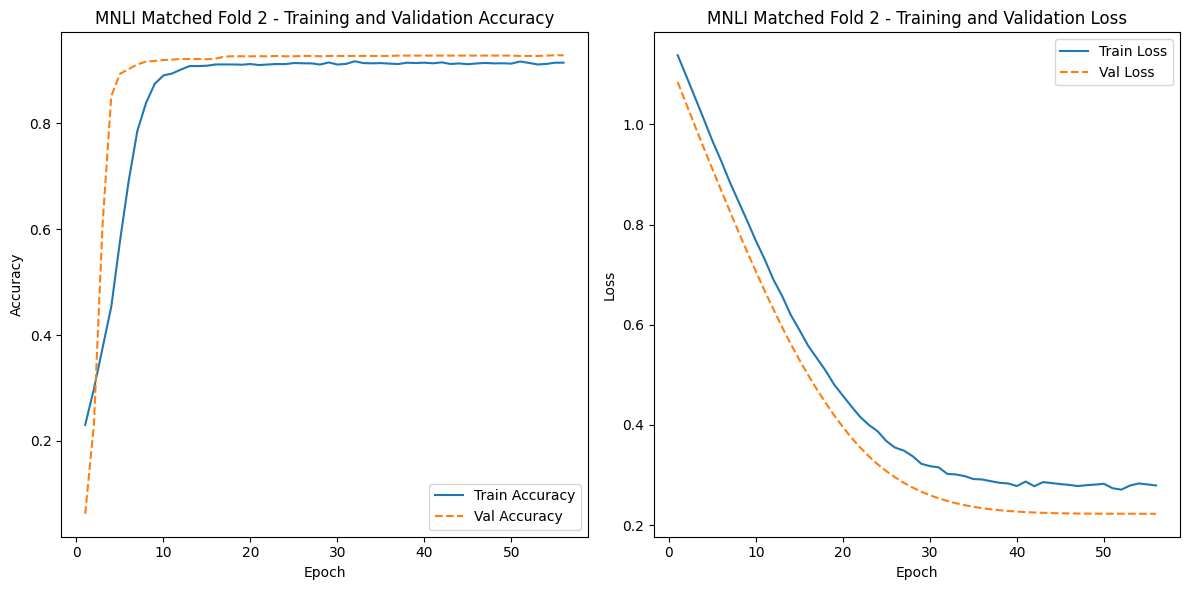

Epoch 1/100, Train Loss: 1.0365, Val Loss: 0.9750, Val Accuracy: 0.5975
Epoch 2/100, Train Loss: 0.9864, Val Loss: 0.9287, Val Accuracy: 0.5994
Epoch 3/100, Train Loss: 0.9408, Val Loss: 0.8842, Val Accuracy: 0.6025
Epoch 4/100, Train Loss: 0.8948, Val Loss: 0.8421, Val Accuracy: 0.6057
Epoch 5/100, Train Loss: 0.8501, Val Loss: 0.8021, Val Accuracy: 0.6236
Epoch 6/100, Train Loss: 0.8101, Val Loss: 0.7647, Val Accuracy: 0.7713
Epoch 7/100, Train Loss: 0.7652, Val Loss: 0.7291, Val Accuracy: 0.8885
Epoch 8/100, Train Loss: 0.7368, Val Loss: 0.6954, Val Accuracy: 0.8930
Epoch 9/100, Train Loss: 0.7036, Val Loss: 0.6632, Val Accuracy: 0.8981
Epoch 10/100, Train Loss: 0.6706, Val Loss: 0.6326, Val Accuracy: 0.8994
Epoch 11/100, Train Loss: 0.6367, Val Loss: 0.6036, Val Accuracy: 0.9000
Epoch 12/100, Train Loss: 0.6089, Val Loss: 0.5761, Val Accuracy: 0.8994
Epoch 13/100, Train Loss: 0.5794, Val Loss: 0.5498, Val Accuracy: 0.8987
Epoch 14/100, Train Loss: 0.5572, Val Loss: 0.5249, Val Accu

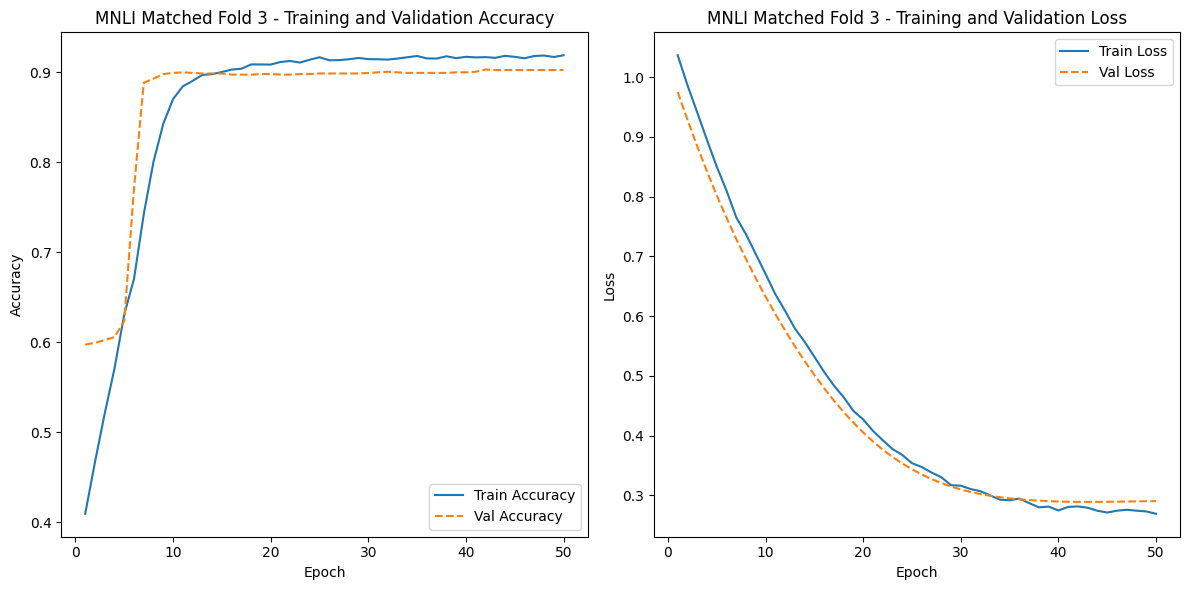

Epoch 1/100, Train Loss: 1.0522, Val Loss: 0.9897, Val Accuracy: 0.6223
Epoch 2/100, Train Loss: 1.0036, Val Loss: 0.9431, Val Accuracy: 0.6229
Epoch 3/100, Train Loss: 0.9571, Val Loss: 0.8996, Val Accuracy: 0.6287
Epoch 4/100, Train Loss: 0.9151, Val Loss: 0.8582, Val Accuracy: 0.6529
Epoch 5/100, Train Loss: 0.8724, Val Loss: 0.8178, Val Accuracy: 0.8949
Epoch 6/100, Train Loss: 0.8331, Val Loss: 0.7783, Val Accuracy: 0.9057
Epoch 7/100, Train Loss: 0.8001, Val Loss: 0.7399, Val Accuracy: 0.9115
Epoch 8/100, Train Loss: 0.7586, Val Loss: 0.7031, Val Accuracy: 0.9127
Epoch 9/100, Train Loss: 0.7255, Val Loss: 0.6679, Val Accuracy: 0.9146
Epoch 10/100, Train Loss: 0.6918, Val Loss: 0.6338, Val Accuracy: 0.9178
Epoch 11/100, Train Loss: 0.6583, Val Loss: 0.6009, Val Accuracy: 0.9185
Epoch 12/100, Train Loss: 0.6271, Val Loss: 0.5696, Val Accuracy: 0.9191
Epoch 13/100, Train Loss: 0.5927, Val Loss: 0.5396, Val Accuracy: 0.9197
Epoch 14/100, Train Loss: 0.5682, Val Loss: 0.5112, Val Accu

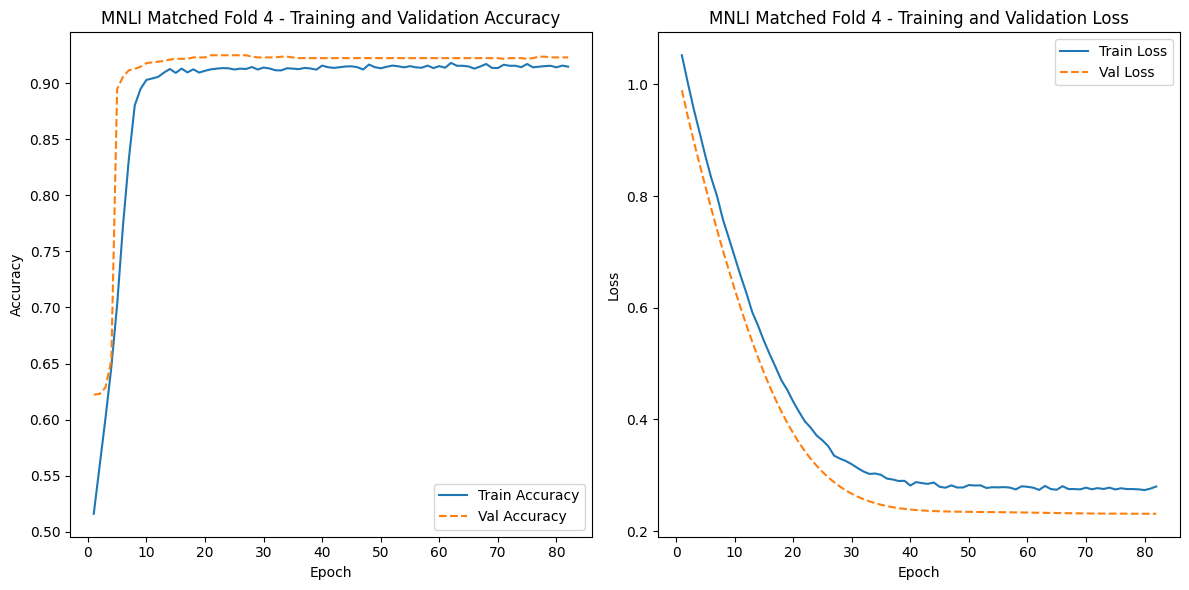

Epoch 1/100, Train Loss: 1.1995, Val Loss: 1.1329, Val Accuracy: 0.3064
Epoch 2/100, Train Loss: 1.1488, Val Loss: 1.0847, Val Accuracy: 0.3070
Epoch 3/100, Train Loss: 1.0982, Val Loss: 1.0380, Val Accuracy: 0.5586
Epoch 4/100, Train Loss: 1.0512, Val Loss: 0.9920, Val Accuracy: 0.5917
Epoch 5/100, Train Loss: 1.0125, Val Loss: 0.9472, Val Accuracy: 0.8471
Epoch 6/100, Train Loss: 0.9651, Val Loss: 0.9034, Val Accuracy: 0.8739
Epoch 7/100, Train Loss: 0.9216, Val Loss: 0.8607, Val Accuracy: 0.8911
Epoch 8/100, Train Loss: 0.8829, Val Loss: 0.8186, Val Accuracy: 0.8962
Epoch 9/100, Train Loss: 0.8371, Val Loss: 0.7776, Val Accuracy: 0.9038
Epoch 10/100, Train Loss: 0.7988, Val Loss: 0.7380, Val Accuracy: 0.9064
Epoch 11/100, Train Loss: 0.7574, Val Loss: 0.6998, Val Accuracy: 0.9076
Epoch 12/100, Train Loss: 0.7205, Val Loss: 0.6631, Val Accuracy: 0.9089
Epoch 13/100, Train Loss: 0.6794, Val Loss: 0.6279, Val Accuracy: 0.9127
Epoch 14/100, Train Loss: 0.6502, Val Loss: 0.5947, Val Accu

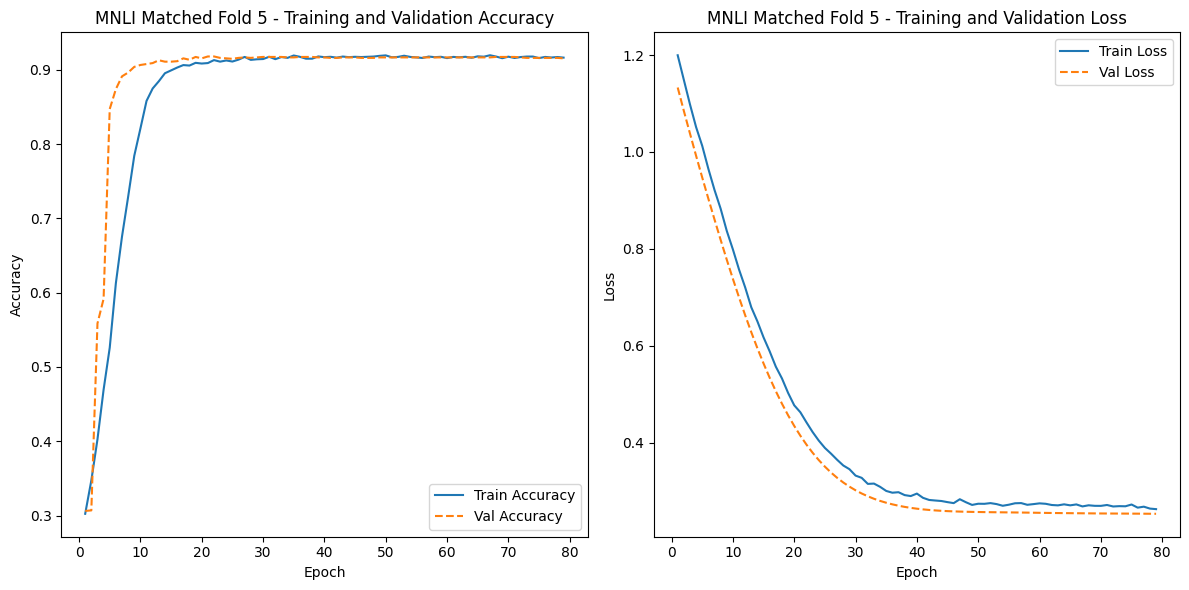

Average Validation Loss for MNLI Matched across 5 folds: 0.2477
Average Validation Accuracy for MNLI Matched across 5 folds: 0.9176


In [39]:
# Task: MNLI Matched
task_name = 'MNLI Matched'
X_train = X_train_mnli_matched
y_train = y_train_mnli_matched
avg_val_loss_mnli_matched, avg_val_accuracy_mnli_matched = cross_validate(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.0275, Val Loss: 0.9650, Val Accuracy: 0.6109
Epoch 2/100, Train Loss: 0.9813, Val Loss: 0.9207, Val Accuracy: 0.6294
Epoch 3/100, Train Loss: 0.9337, Val Loss: 0.8781, Val Accuracy: 0.8665
Epoch 4/100, Train Loss: 0.8918, Val Loss: 0.8382, Val Accuracy: 0.8926
Epoch 5/100, Train Loss: 0.8525, Val Loss: 0.8008, Val Accuracy: 0.9008
Epoch 6/100, Train Loss: 0.8180, Val Loss: 0.7651, Val Accuracy: 0.9059
Epoch 7/100, Train Loss: 0.7830, Val Loss: 0.7310, Val Accuracy: 0.9085
Epoch 8/100, Train Loss: 0.7466, Val Loss: 0.6978, Val Accuracy: 0.9104
Epoch 9/100, Train Loss: 0.7194, Val Loss: 0.6655, Val Accuracy: 0.9110
Epoch 10/100, Train Loss: 0.6870, Val Loss: 0.6343, Val Accuracy: 0.9129
Epoch 11/100, Train Loss: 0.6624, Val Loss: 0.6041, Val Accuracy: 0.9129
Epoch 12/100, Train Loss: 0.6302, Val Loss: 0.5751, Val Accuracy: 0.9142
Epoch 13/100, Train Loss: 0.6018, Val Loss: 0.5473, Val Accuracy: 0.9148
Epoch 14/100, Train Loss: 0.5743, Val Loss: 0.5213, Val Accu

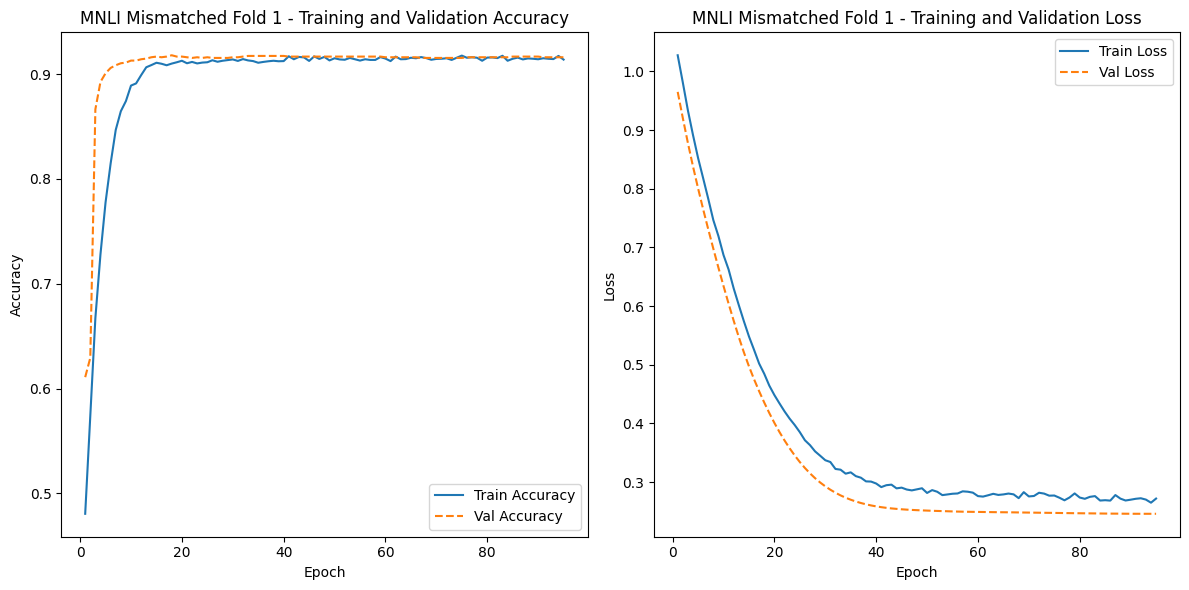

Epoch 1/100, Train Loss: 0.9999, Val Loss: 0.9331, Val Accuracy: 0.8786
Epoch 2/100, Train Loss: 0.9488, Val Loss: 0.8878, Val Accuracy: 0.8894
Epoch 3/100, Train Loss: 0.9007, Val Loss: 0.8457, Val Accuracy: 0.8945
Epoch 4/100, Train Loss: 0.8562, Val Loss: 0.8075, Val Accuracy: 0.8957
Epoch 5/100, Train Loss: 0.8120, Val Loss: 0.7720, Val Accuracy: 0.8964
Epoch 6/100, Train Loss: 0.7829, Val Loss: 0.7384, Val Accuracy: 0.8945
Epoch 7/100, Train Loss: 0.7498, Val Loss: 0.7062, Val Accuracy: 0.8964
Epoch 8/100, Train Loss: 0.7156, Val Loss: 0.6752, Val Accuracy: 0.8970
Epoch 9/100, Train Loss: 0.6851, Val Loss: 0.6454, Val Accuracy: 0.8983
Epoch 10/100, Train Loss: 0.6559, Val Loss: 0.6168, Val Accuracy: 0.8996
Epoch 11/100, Train Loss: 0.6258, Val Loss: 0.5893, Val Accuracy: 0.9021
Epoch 12/100, Train Loss: 0.5985, Val Loss: 0.5632, Val Accuracy: 0.9021
Epoch 13/100, Train Loss: 0.5740, Val Loss: 0.5384, Val Accuracy: 0.9015
Epoch 14/100, Train Loss: 0.5516, Val Loss: 0.5148, Val Accu

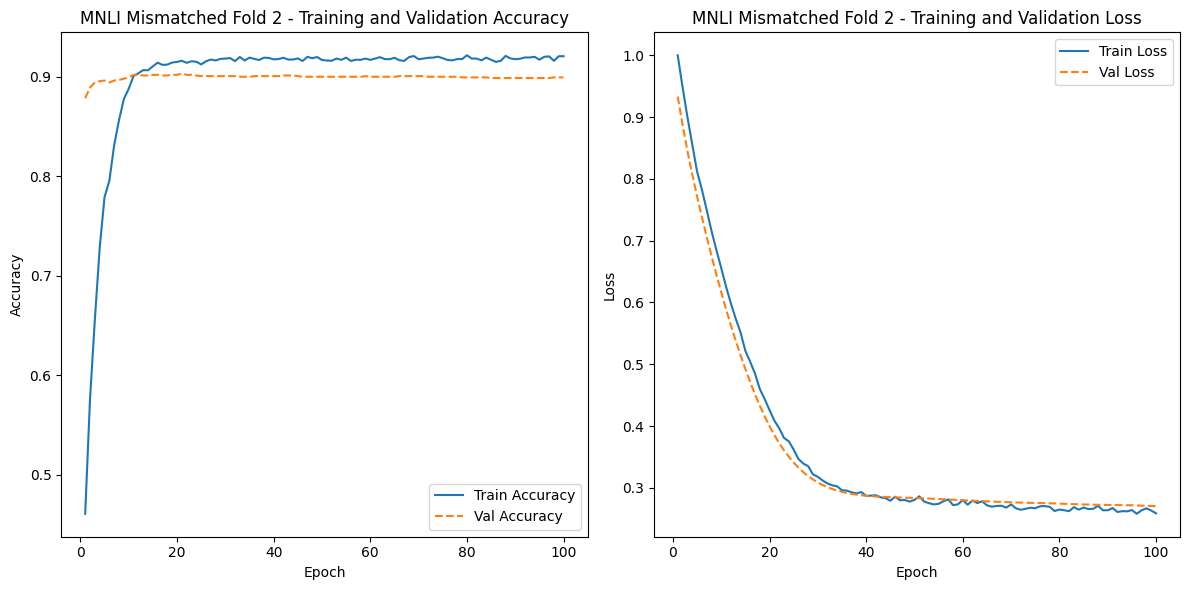

Epoch 1/100, Train Loss: 1.0257, Val Loss: 0.9477, Val Accuracy: 0.3249
Epoch 2/100, Train Loss: 0.9691, Val Loss: 0.8893, Val Accuracy: 0.5232
Epoch 3/100, Train Loss: 0.9090, Val Loss: 0.8344, Val Accuracy: 0.5804
Epoch 4/100, Train Loss: 0.8567, Val Loss: 0.7827, Val Accuracy: 0.8703
Epoch 5/100, Train Loss: 0.8068, Val Loss: 0.7345, Val Accuracy: 0.8989
Epoch 6/100, Train Loss: 0.7547, Val Loss: 0.6900, Val Accuracy: 0.9072
Epoch 7/100, Train Loss: 0.7136, Val Loss: 0.6493, Val Accuracy: 0.9110
Epoch 8/100, Train Loss: 0.6733, Val Loss: 0.6129, Val Accuracy: 0.9129
Epoch 9/100, Train Loss: 0.6334, Val Loss: 0.5793, Val Accuracy: 0.9148
Epoch 10/100, Train Loss: 0.6048, Val Loss: 0.5481, Val Accuracy: 0.9154
Epoch 11/100, Train Loss: 0.5720, Val Loss: 0.5191, Val Accuracy: 0.9161
Epoch 12/100, Train Loss: 0.5458, Val Loss: 0.4926, Val Accuracy: 0.9167
Epoch 13/100, Train Loss: 0.5150, Val Loss: 0.4682, Val Accuracy: 0.9167
Epoch 14/100, Train Loss: 0.4954, Val Loss: 0.4456, Val Accu

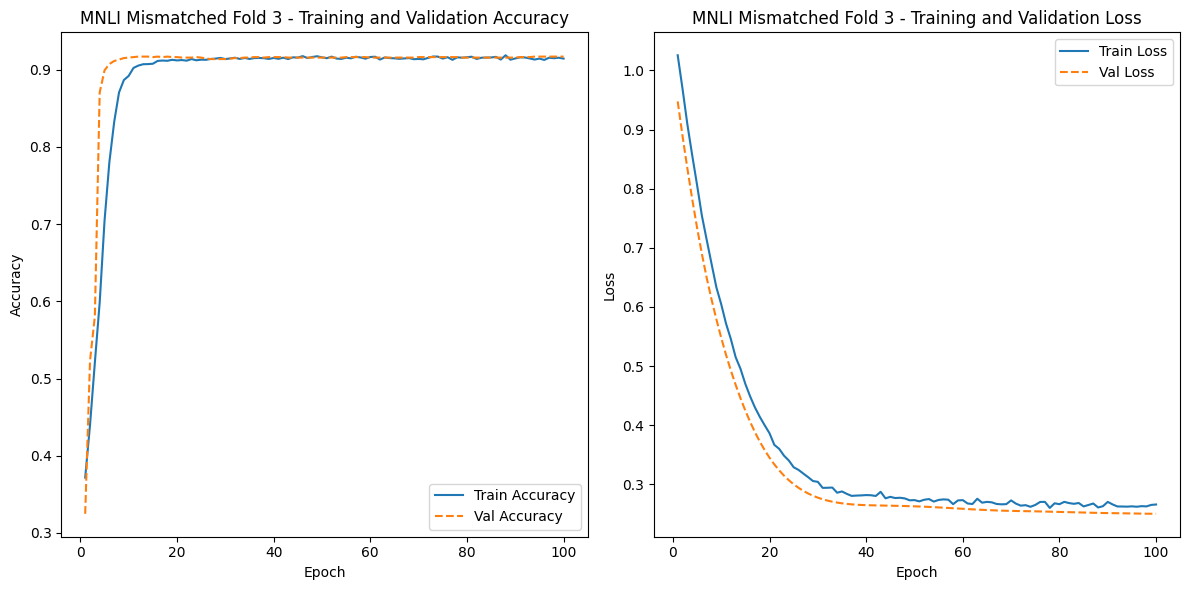

Epoch 1/100, Train Loss: 1.2036, Val Loss: 1.1494, Val Accuracy: 0.0490
Epoch 2/100, Train Loss: 1.1569, Val Loss: 1.1080, Val Accuracy: 0.0585
Epoch 3/100, Train Loss: 1.1162, Val Loss: 1.0681, Val Accuracy: 0.1863
Epoch 4/100, Train Loss: 1.0781, Val Loss: 1.0294, Val Accuracy: 0.5601
Epoch 5/100, Train Loss: 1.0400, Val Loss: 0.9917, Val Accuracy: 0.5900
Epoch 6/100, Train Loss: 0.9995, Val Loss: 0.9547, Val Accuracy: 0.6027
Epoch 7/100, Train Loss: 0.9660, Val Loss: 0.9186, Val Accuracy: 0.8175
Epoch 8/100, Train Loss: 0.9318, Val Loss: 0.8836, Val Accuracy: 0.8932
Epoch 9/100, Train Loss: 0.8957, Val Loss: 0.8494, Val Accuracy: 0.9072
Epoch 10/100, Train Loss: 0.8634, Val Loss: 0.8160, Val Accuracy: 0.9167
Epoch 11/100, Train Loss: 0.8314, Val Loss: 0.7832, Val Accuracy: 0.9205
Epoch 12/100, Train Loss: 0.7949, Val Loss: 0.7510, Val Accuracy: 0.9224
Epoch 13/100, Train Loss: 0.7692, Val Loss: 0.7196, Val Accuracy: 0.9212
Epoch 14/100, Train Loss: 0.7375, Val Loss: 0.6888, Val Accu

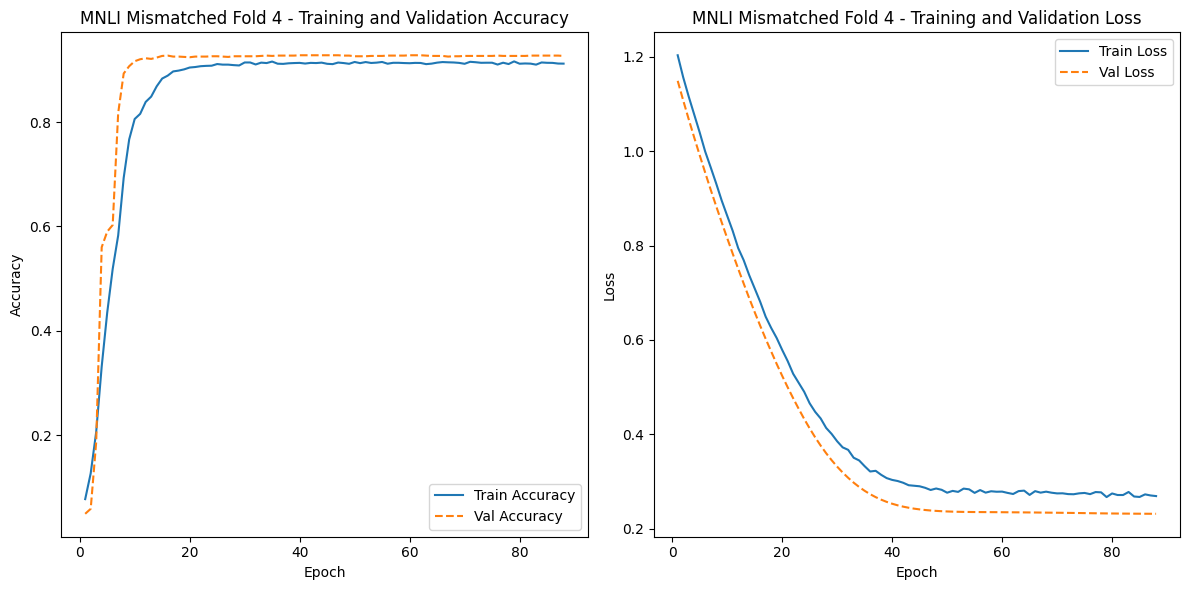

Epoch 1/100, Train Loss: 1.2793, Val Loss: 1.2039, Val Accuracy: 0.0381
Epoch 2/100, Train Loss: 1.2199, Val Loss: 1.1451, Val Accuracy: 0.0439
Epoch 3/100, Train Loss: 1.1579, Val Loss: 1.0885, Val Accuracy: 0.3013
Epoch 4/100, Train Loss: 1.1042, Val Loss: 1.0351, Val Accuracy: 0.3363
Epoch 5/100, Train Loss: 1.0487, Val Loss: 0.9844, Val Accuracy: 0.5645
Epoch 6/100, Train Loss: 0.9997, Val Loss: 0.9357, Val Accuracy: 0.8468
Epoch 7/100, Train Loss: 0.9520, Val Loss: 0.8890, Val Accuracy: 0.8862
Epoch 8/100, Train Loss: 0.9037, Val Loss: 0.8453, Val Accuracy: 0.9008
Epoch 9/100, Train Loss: 0.8587, Val Loss: 0.8034, Val Accuracy: 0.9072
Epoch 10/100, Train Loss: 0.8248, Val Loss: 0.7630, Val Accuracy: 0.9154
Epoch 11/100, Train Loss: 0.7871, Val Loss: 0.7245, Val Accuracy: 0.9154
Epoch 12/100, Train Loss: 0.7441, Val Loss: 0.6881, Val Accuracy: 0.9174
Epoch 13/100, Train Loss: 0.7108, Val Loss: 0.6538, Val Accuracy: 0.9186
Epoch 14/100, Train Loss: 0.6760, Val Loss: 0.6214, Val Accu

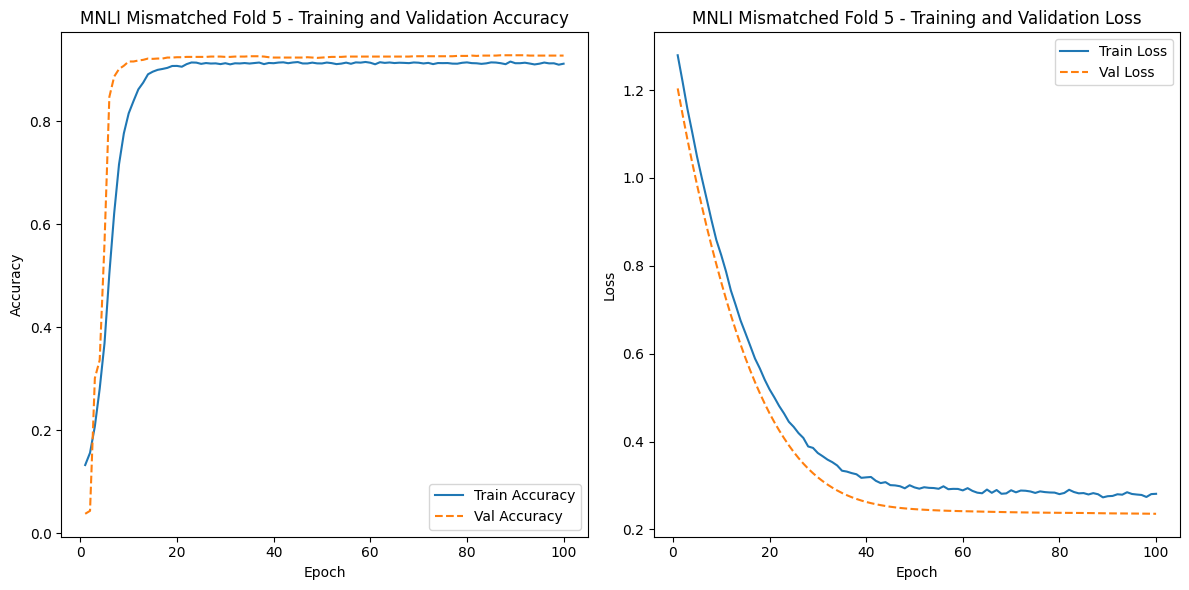

Average Validation Loss for MNLI Mismatched across 5 folds: 0.2468
Average Validation Accuracy for MNLI Mismatched across 5 folds: 0.9172


In [40]:
# Task: MNLI Mismatched
task_name = 'MNLI Mismatched'
X_train = X_train_mnli_mismatched
y_train = y_train_mnli_mismatched
avg_val_loss_mnli_mismatched, avg_val_accuracy_mnli_mismatched = cross_validate(task_name, X_train, y_train)



Epoch 1/100, Train Loss: 1.2554, Val Loss: 1.1310, Val Accuracy: 0.3812
Epoch 2/100, Train Loss: 1.2185, Val Loss: 1.0994, Val Accuracy: 0.3812
Epoch 3/100, Train Loss: 1.1704, Val Loss: 1.0696, Val Accuracy: 0.4000
Epoch 4/100, Train Loss: 1.1294, Val Loss: 1.0411, Val Accuracy: 0.4250
Epoch 5/100, Train Loss: 1.1161, Val Loss: 1.0140, Val Accuracy: 0.4437
Epoch 6/100, Train Loss: 1.0733, Val Loss: 0.9881, Val Accuracy: 0.4562
Epoch 7/100, Train Loss: 1.0364, Val Loss: 0.9633, Val Accuracy: 0.5437
Epoch 8/100, Train Loss: 1.0199, Val Loss: 0.9396, Val Accuracy: 0.6000
Epoch 9/100, Train Loss: 0.9789, Val Loss: 0.9173, Val Accuracy: 0.7250
Epoch 10/100, Train Loss: 0.9653, Val Loss: 0.8959, Val Accuracy: 0.7312
Epoch 11/100, Train Loss: 0.9387, Val Loss: 0.8751, Val Accuracy: 0.7375
Epoch 12/100, Train Loss: 0.9098, Val Loss: 0.8551, Val Accuracy: 0.7312
Epoch 13/100, Train Loss: 0.8852, Val Loss: 0.8357, Val Accuracy: 0.7312
Epoch 14/100, Train Loss: 0.8666, Val Loss: 0.8171, Val Accu

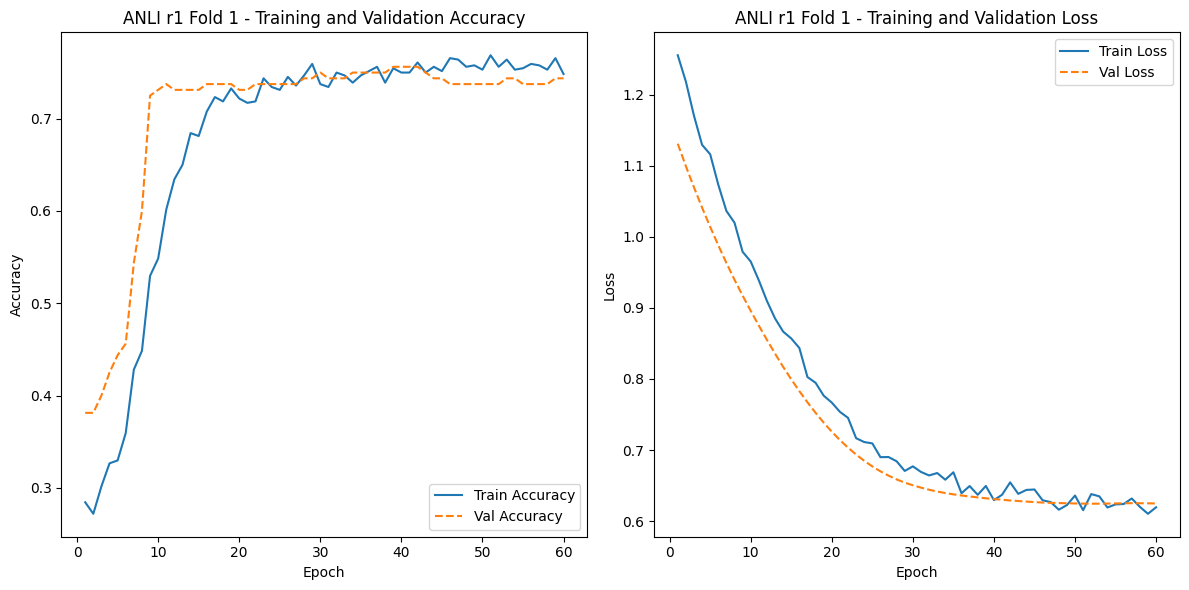

Epoch 1/100, Train Loss: 1.1426, Val Loss: 1.0599, Val Accuracy: 0.3563
Epoch 2/100, Train Loss: 1.1143, Val Loss: 1.0333, Val Accuracy: 0.4875
Epoch 3/100, Train Loss: 1.0640, Val Loss: 1.0085, Val Accuracy: 0.5062
Epoch 4/100, Train Loss: 1.0436, Val Loss: 0.9851, Val Accuracy: 0.5125
Epoch 5/100, Train Loss: 1.0023, Val Loss: 0.9632, Val Accuracy: 0.5250
Epoch 6/100, Train Loss: 0.9725, Val Loss: 0.9426, Val Accuracy: 0.6562
Epoch 7/100, Train Loss: 0.9451, Val Loss: 0.9234, Val Accuracy: 0.6500
Epoch 8/100, Train Loss: 0.9207, Val Loss: 0.9054, Val Accuracy: 0.6250
Epoch 9/100, Train Loss: 0.9030, Val Loss: 0.8885, Val Accuracy: 0.6438
Epoch 10/100, Train Loss: 0.8803, Val Loss: 0.8727, Val Accuracy: 0.6438
Epoch 11/100, Train Loss: 0.8555, Val Loss: 0.8581, Val Accuracy: 0.6438
Epoch 12/100, Train Loss: 0.8246, Val Loss: 0.8447, Val Accuracy: 0.6438
Epoch 13/100, Train Loss: 0.8058, Val Loss: 0.8325, Val Accuracy: 0.6500
Epoch 14/100, Train Loss: 0.7876, Val Loss: 0.8213, Val Accu

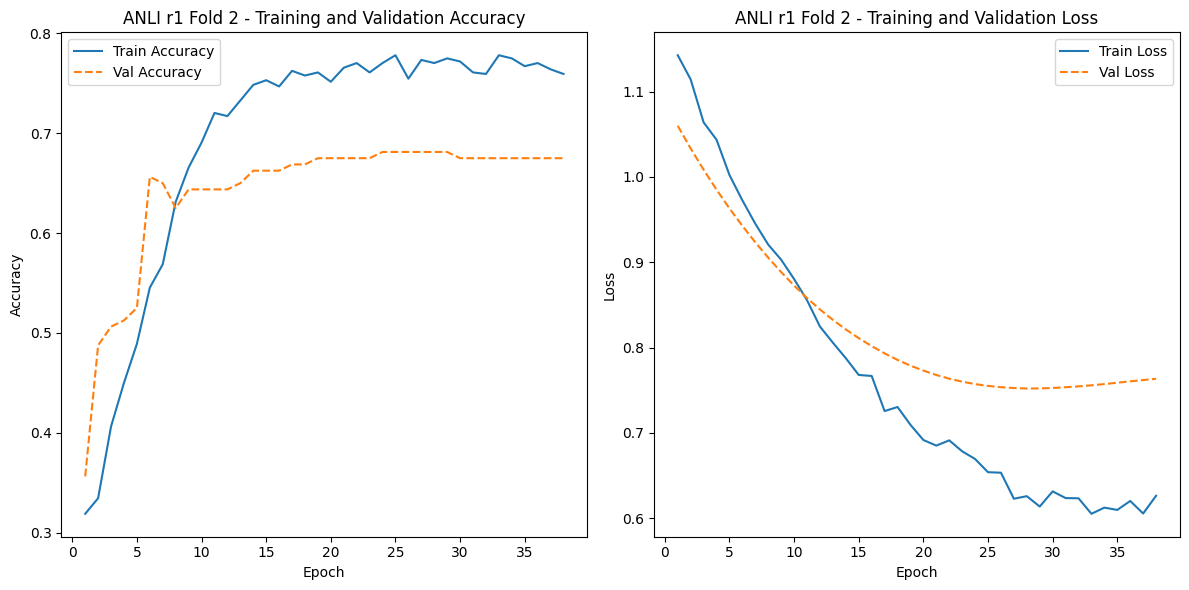

Epoch 1/100, Train Loss: 1.1814, Val Loss: 1.1214, Val Accuracy: 0.3125
Epoch 2/100, Train Loss: 1.1390, Val Loss: 1.0828, Val Accuracy: 0.3125
Epoch 3/100, Train Loss: 1.1028, Val Loss: 1.0463, Val Accuracy: 0.3187
Epoch 4/100, Train Loss: 1.0792, Val Loss: 1.0116, Val Accuracy: 0.4125
Epoch 5/100, Train Loss: 1.0327, Val Loss: 0.9789, Val Accuracy: 0.4750
Epoch 6/100, Train Loss: 1.0054, Val Loss: 0.9482, Val Accuracy: 0.6625
Epoch 7/100, Train Loss: 0.9762, Val Loss: 0.9193, Val Accuracy: 0.6937
Epoch 8/100, Train Loss: 0.9563, Val Loss: 0.8920, Val Accuracy: 0.7312
Epoch 9/100, Train Loss: 0.9272, Val Loss: 0.8661, Val Accuracy: 0.7688
Epoch 10/100, Train Loss: 0.9110, Val Loss: 0.8415, Val Accuracy: 0.7688
Epoch 11/100, Train Loss: 0.8962, Val Loss: 0.8176, Val Accuracy: 0.7750
Epoch 12/100, Train Loss: 0.8751, Val Loss: 0.7945, Val Accuracy: 0.7812
Epoch 13/100, Train Loss: 0.8515, Val Loss: 0.7722, Val Accuracy: 0.7750
Epoch 14/100, Train Loss: 0.8223, Val Loss: 0.7505, Val Accu

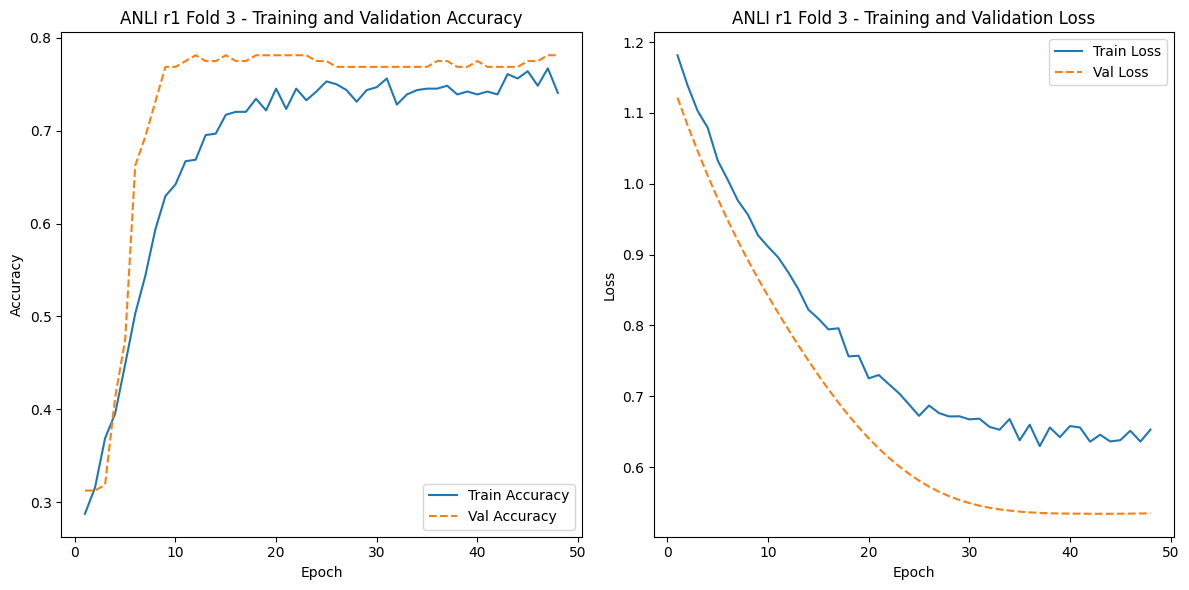

Epoch 1/100, Train Loss: 1.1017, Val Loss: 1.0509, Val Accuracy: 0.4562
Epoch 2/100, Train Loss: 1.0891, Val Loss: 1.0168, Val Accuracy: 0.4750
Epoch 3/100, Train Loss: 1.0436, Val Loss: 0.9850, Val Accuracy: 0.4875
Epoch 4/100, Train Loss: 1.0080, Val Loss: 0.9557, Val Accuracy: 0.5312
Epoch 5/100, Train Loss: 0.9747, Val Loss: 0.9285, Val Accuracy: 0.6188
Epoch 6/100, Train Loss: 0.9427, Val Loss: 0.9032, Val Accuracy: 0.6875
Epoch 7/100, Train Loss: 0.9069, Val Loss: 0.8798, Val Accuracy: 0.7063
Epoch 8/100, Train Loss: 0.8937, Val Loss: 0.8580, Val Accuracy: 0.7188
Epoch 9/100, Train Loss: 0.8562, Val Loss: 0.8376, Val Accuracy: 0.7312
Epoch 10/100, Train Loss: 0.8380, Val Loss: 0.8185, Val Accuracy: 0.7312
Epoch 11/100, Train Loss: 0.8333, Val Loss: 0.8006, Val Accuracy: 0.7312
Epoch 12/100, Train Loss: 0.7993, Val Loss: 0.7840, Val Accuracy: 0.7312
Epoch 13/100, Train Loss: 0.7879, Val Loss: 0.7686, Val Accuracy: 0.7250
Epoch 14/100, Train Loss: 0.7767, Val Loss: 0.7544, Val Accu

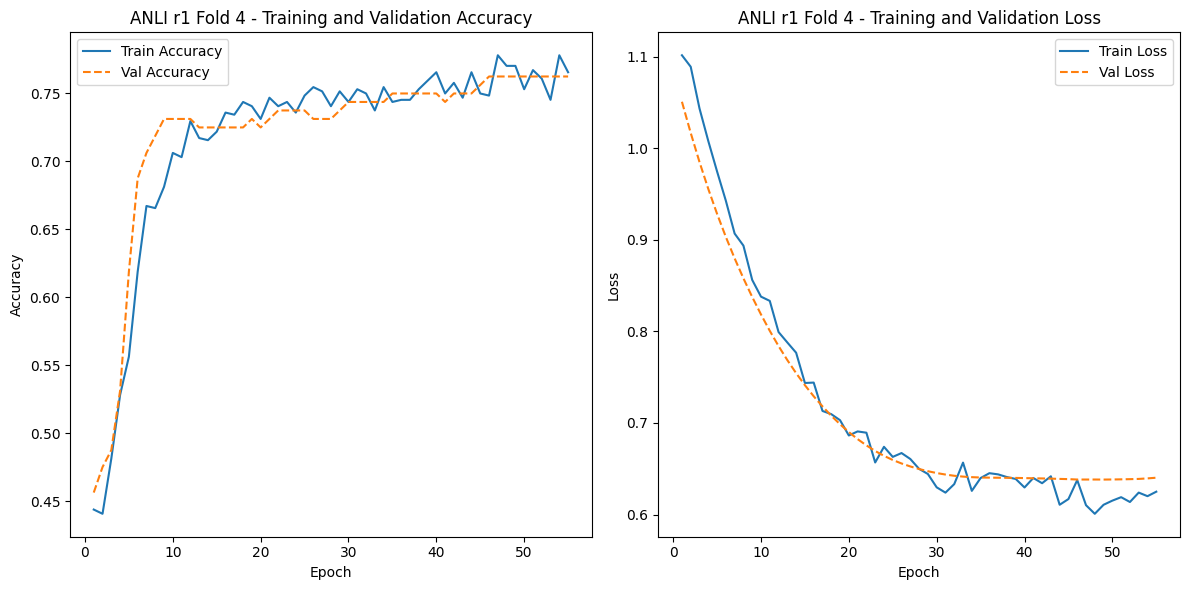

Epoch 1/100, Train Loss: 1.1282, Val Loss: 1.0846, Val Accuracy: 0.4750
Epoch 2/100, Train Loss: 1.0894, Val Loss: 1.0445, Val Accuracy: 0.4813
Epoch 3/100, Train Loss: 1.0609, Val Loss: 1.0069, Val Accuracy: 0.5188
Epoch 4/100, Train Loss: 1.0164, Val Loss: 0.9715, Val Accuracy: 0.6375
Epoch 5/100, Train Loss: 0.9990, Val Loss: 0.9384, Val Accuracy: 0.7562
Epoch 6/100, Train Loss: 0.9679, Val Loss: 0.9073, Val Accuracy: 0.7562
Epoch 7/100, Train Loss: 0.9426, Val Loss: 0.8780, Val Accuracy: 0.7625
Epoch 8/100, Train Loss: 0.9160, Val Loss: 0.8503, Val Accuracy: 0.7625
Epoch 9/100, Train Loss: 0.9024, Val Loss: 0.8240, Val Accuracy: 0.7625
Epoch 10/100, Train Loss: 0.8780, Val Loss: 0.7991, Val Accuracy: 0.7625
Epoch 11/100, Train Loss: 0.8657, Val Loss: 0.7756, Val Accuracy: 0.7625
Epoch 12/100, Train Loss: 0.8549, Val Loss: 0.7535, Val Accuracy: 0.7625
Epoch 13/100, Train Loss: 0.8328, Val Loss: 0.7326, Val Accuracy: 0.7625
Epoch 14/100, Train Loss: 0.7981, Val Loss: 0.7130, Val Accu

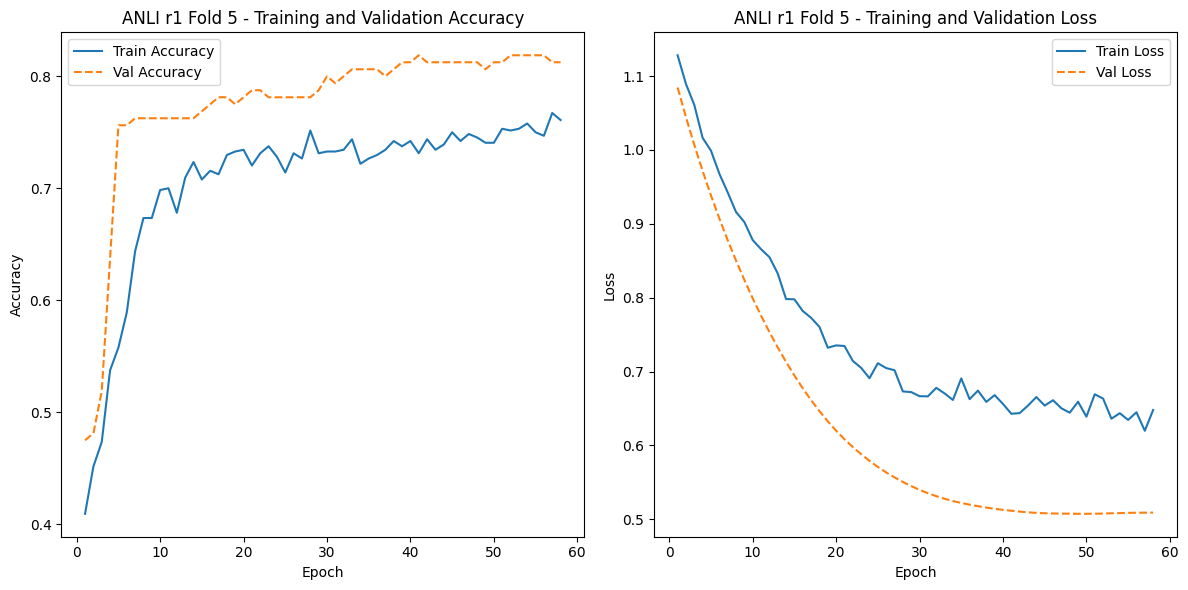

Average Validation Loss for ANLI r1 across 5 folds: 0.6144
Average Validation Accuracy for ANLI r1 across 5 folds: 0.7550


In [41]:
# Task: ANLI r1
task_name = 'ANLI r1'
X_train = X_train_anli_r1
y_train = y_train_anli_r1
avg_val_loss_anli_r1, avg_val_accuracy_anli_r1 = cross_validate(task_name, X_train, y_train)



Epoch 1/100, Train Loss: 1.2532, Val Loss: 1.2474, Val Accuracy: 0.1875
Epoch 2/100, Train Loss: 1.2227, Val Loss: 1.2068, Val Accuracy: 0.1875
Epoch 3/100, Train Loss: 1.1856, Val Loss: 1.1688, Val Accuracy: 0.3187
Epoch 4/100, Train Loss: 1.1498, Val Loss: 1.1331, Val Accuracy: 0.3563
Epoch 5/100, Train Loss: 1.1227, Val Loss: 1.0997, Val Accuracy: 0.3812
Epoch 6/100, Train Loss: 1.0916, Val Loss: 1.0687, Val Accuracy: 0.3937
Epoch 7/100, Train Loss: 1.0713, Val Loss: 1.0399, Val Accuracy: 0.4188
Epoch 8/100, Train Loss: 1.0386, Val Loss: 1.0129, Val Accuracy: 0.4625
Epoch 9/100, Train Loss: 1.0207, Val Loss: 0.9873, Val Accuracy: 0.4875
Epoch 10/100, Train Loss: 1.0076, Val Loss: 0.9631, Val Accuracy: 0.5125
Epoch 11/100, Train Loss: 0.9889, Val Loss: 0.9398, Val Accuracy: 0.6312
Epoch 12/100, Train Loss: 0.9907, Val Loss: 0.9176, Val Accuracy: 0.6875
Epoch 13/100, Train Loss: 0.9512, Val Loss: 0.8966, Val Accuracy: 0.6875
Epoch 14/100, Train Loss: 0.9279, Val Loss: 0.8766, Val Accu

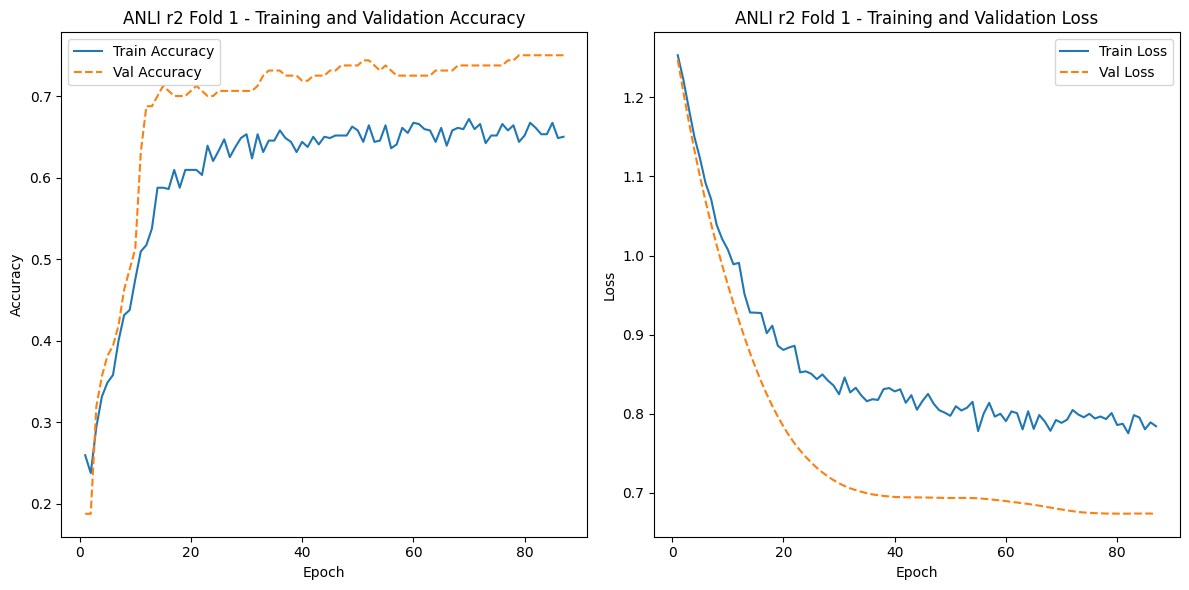

Epoch 1/100, Train Loss: 1.2011, Val Loss: 1.1635, Val Accuracy: 0.2250
Epoch 2/100, Train Loss: 1.1788, Val Loss: 1.1378, Val Accuracy: 0.2313
Epoch 3/100, Train Loss: 1.1401, Val Loss: 1.1136, Val Accuracy: 0.2750
Epoch 4/100, Train Loss: 1.1090, Val Loss: 1.0910, Val Accuracy: 0.3063
Epoch 5/100, Train Loss: 1.0944, Val Loss: 1.0699, Val Accuracy: 0.3438
Epoch 6/100, Train Loss: 1.0755, Val Loss: 1.0500, Val Accuracy: 0.4375
Epoch 7/100, Train Loss: 1.0580, Val Loss: 1.0312, Val Accuracy: 0.6000
Epoch 8/100, Train Loss: 1.0492, Val Loss: 1.0134, Val Accuracy: 0.6062
Epoch 9/100, Train Loss: 1.0236, Val Loss: 0.9964, Val Accuracy: 0.6188
Epoch 10/100, Train Loss: 1.0121, Val Loss: 0.9804, Val Accuracy: 0.6687
Epoch 11/100, Train Loss: 1.0017, Val Loss: 0.9652, Val Accuracy: 0.6687
Epoch 12/100, Train Loss: 0.9873, Val Loss: 0.9506, Val Accuracy: 0.6562
Epoch 13/100, Train Loss: 0.9555, Val Loss: 0.9367, Val Accuracy: 0.6625
Epoch 14/100, Train Loss: 0.9468, Val Loss: 0.9235, Val Accu

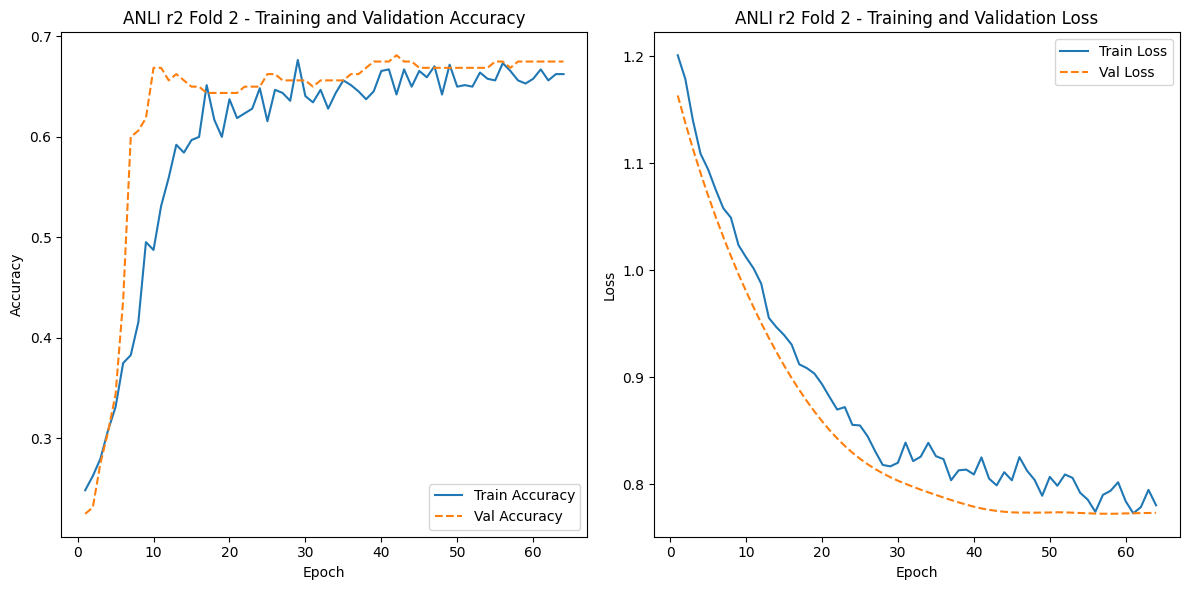

Epoch 1/100, Train Loss: 1.1643, Val Loss: 1.1433, Val Accuracy: 0.2938
Epoch 2/100, Train Loss: 1.1492, Val Loss: 1.1159, Val Accuracy: 0.3000
Epoch 3/100, Train Loss: 1.1048, Val Loss: 1.0908, Val Accuracy: 0.3125
Epoch 4/100, Train Loss: 1.0722, Val Loss: 1.0678, Val Accuracy: 0.4313
Epoch 5/100, Train Loss: 1.0561, Val Loss: 1.0465, Val Accuracy: 0.5188
Epoch 6/100, Train Loss: 1.0338, Val Loss: 1.0269, Val Accuracy: 0.5375
Epoch 7/100, Train Loss: 1.0118, Val Loss: 1.0088, Val Accuracy: 0.5312
Epoch 8/100, Train Loss: 0.9999, Val Loss: 0.9919, Val Accuracy: 0.5750
Epoch 9/100, Train Loss: 0.9886, Val Loss: 0.9760, Val Accuracy: 0.5875
Epoch 10/100, Train Loss: 0.9794, Val Loss: 0.9611, Val Accuracy: 0.5938
Epoch 11/100, Train Loss: 0.9541, Val Loss: 0.9471, Val Accuracy: 0.5938
Epoch 12/100, Train Loss: 0.9549, Val Loss: 0.9339, Val Accuracy: 0.5938
Epoch 13/100, Train Loss: 0.9329, Val Loss: 0.9214, Val Accuracy: 0.5938
Epoch 14/100, Train Loss: 0.9216, Val Loss: 0.9098, Val Accu

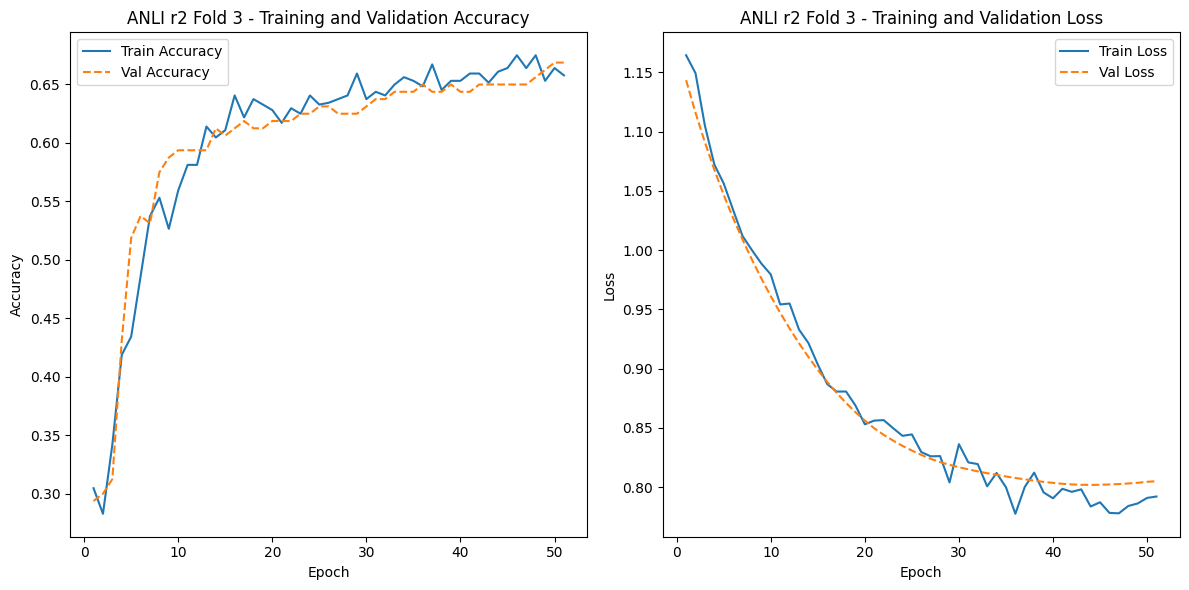

Epoch 1/100, Train Loss: 1.1989, Val Loss: 1.1519, Val Accuracy: 0.3125
Epoch 2/100, Train Loss: 1.1606, Val Loss: 1.1298, Val Accuracy: 0.3312
Epoch 3/100, Train Loss: 1.1383, Val Loss: 1.1094, Val Accuracy: 0.3375
Epoch 4/100, Train Loss: 1.1214, Val Loss: 1.0903, Val Accuracy: 0.3563
Epoch 5/100, Train Loss: 1.1035, Val Loss: 1.0722, Val Accuracy: 0.3937
Epoch 6/100, Train Loss: 1.0692, Val Loss: 1.0551, Val Accuracy: 0.4188
Epoch 7/100, Train Loss: 1.0589, Val Loss: 1.0388, Val Accuracy: 0.4813
Epoch 8/100, Train Loss: 1.0327, Val Loss: 1.0234, Val Accuracy: 0.5938
Epoch 9/100, Train Loss: 1.0320, Val Loss: 1.0088, Val Accuracy: 0.6000
Epoch 10/100, Train Loss: 1.0032, Val Loss: 0.9950, Val Accuracy: 0.6188
Epoch 11/100, Train Loss: 0.9868, Val Loss: 0.9819, Val Accuracy: 0.6188
Epoch 12/100, Train Loss: 0.9756, Val Loss: 0.9694, Val Accuracy: 0.6188
Epoch 13/100, Train Loss: 0.9573, Val Loss: 0.9577, Val Accuracy: 0.6312
Epoch 14/100, Train Loss: 0.9632, Val Loss: 0.9467, Val Accu

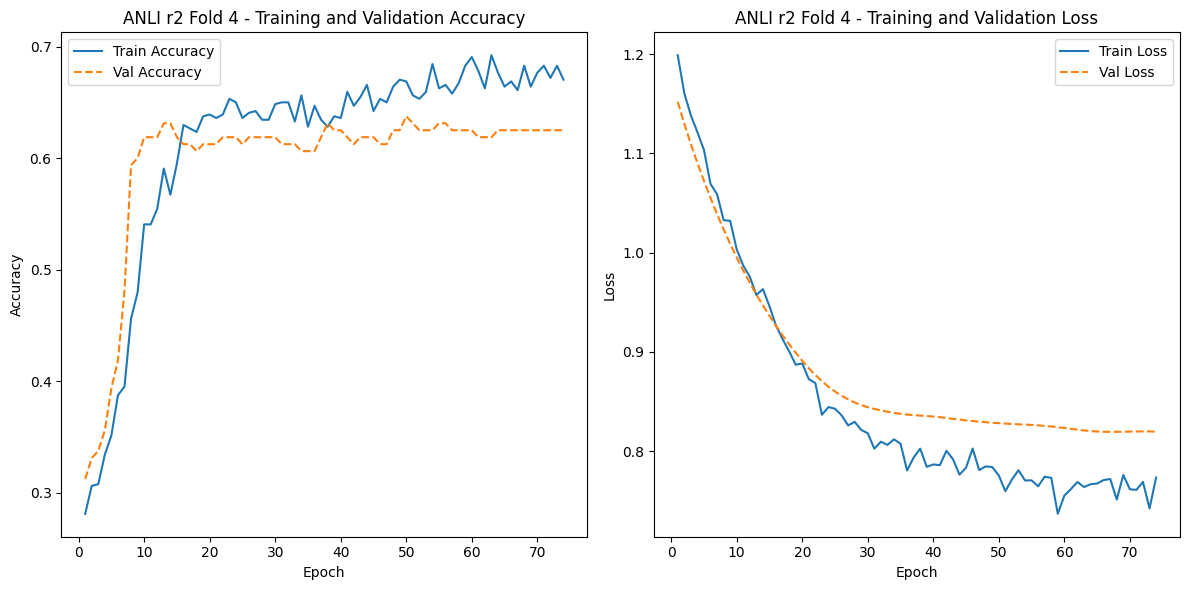

Epoch 1/100, Train Loss: 1.2085, Val Loss: 1.1303, Val Accuracy: 0.4250
Epoch 2/100, Train Loss: 1.1621, Val Loss: 1.1035, Val Accuracy: 0.4500
Epoch 3/100, Train Loss: 1.1531, Val Loss: 1.0789, Val Accuracy: 0.5062
Epoch 4/100, Train Loss: 1.1012, Val Loss: 1.0560, Val Accuracy: 0.5188
Epoch 5/100, Train Loss: 1.0808, Val Loss: 1.0351, Val Accuracy: 0.5125
Epoch 6/100, Train Loss: 1.0582, Val Loss: 1.0159, Val Accuracy: 0.5125
Epoch 7/100, Train Loss: 1.0276, Val Loss: 0.9982, Val Accuracy: 0.5062
Epoch 8/100, Train Loss: 1.0115, Val Loss: 0.9819, Val Accuracy: 0.5062
Epoch 9/100, Train Loss: 0.9895, Val Loss: 0.9671, Val Accuracy: 0.5125
Epoch 10/100, Train Loss: 0.9869, Val Loss: 0.9537, Val Accuracy: 0.5250
Epoch 11/100, Train Loss: 0.9594, Val Loss: 0.9414, Val Accuracy: 0.5875
Epoch 12/100, Train Loss: 0.9585, Val Loss: 0.9299, Val Accuracy: 0.6375
Epoch 13/100, Train Loss: 0.9372, Val Loss: 0.9194, Val Accuracy: 0.6562
Epoch 14/100, Train Loss: 0.9223, Val Loss: 0.9098, Val Accu

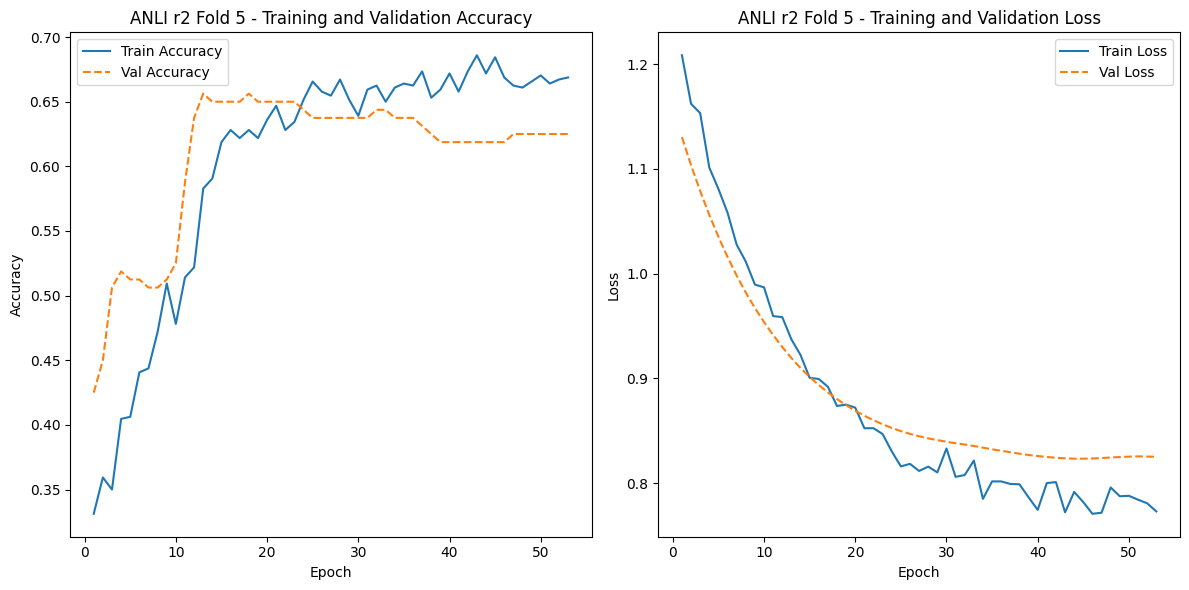

Average Validation Loss for ANLI r2 across 5 folds: 0.7792
Average Validation Accuracy for ANLI r2 across 5 folds: 0.6687


In [42]:
# Task: ANLI r2
task_name = 'ANLI r2'
X_train = X_train_anli_r2
y_train = y_train_anli_r2
avg_val_loss_anli_r2, avg_val_accuracy_anli_r2 = cross_validate(task_name, X_train, y_train)


Epoch 1/100, Train Loss: 1.1435, Val Loss: 1.0934, Val Accuracy: 0.3385
Epoch 2/100, Train Loss: 1.1269, Val Loss: 1.0669, Val Accuracy: 0.3438
Epoch 3/100, Train Loss: 1.0910, Val Loss: 1.0422, Val Accuracy: 0.3542
Epoch 4/100, Train Loss: 1.0879, Val Loss: 1.0191, Val Accuracy: 0.4427
Epoch 5/100, Train Loss: 1.0589, Val Loss: 0.9976, Val Accuracy: 0.5260
Epoch 6/100, Train Loss: 1.0364, Val Loss: 0.9772, Val Accuracy: 0.6042
Epoch 7/100, Train Loss: 1.0086, Val Loss: 0.9579, Val Accuracy: 0.6094
Epoch 8/100, Train Loss: 0.9968, Val Loss: 0.9396, Val Accuracy: 0.6094
Epoch 9/100, Train Loss: 0.9817, Val Loss: 0.9223, Val Accuracy: 0.6198
Epoch 10/100, Train Loss: 0.9670, Val Loss: 0.9058, Val Accuracy: 0.6198
Epoch 11/100, Train Loss: 0.9512, Val Loss: 0.8902, Val Accuracy: 0.6250
Epoch 12/100, Train Loss: 0.9418, Val Loss: 0.8754, Val Accuracy: 0.6302
Epoch 13/100, Train Loss: 0.9244, Val Loss: 0.8615, Val Accuracy: 0.6354
Epoch 14/100, Train Loss: 0.9381, Val Loss: 0.8486, Val Accu

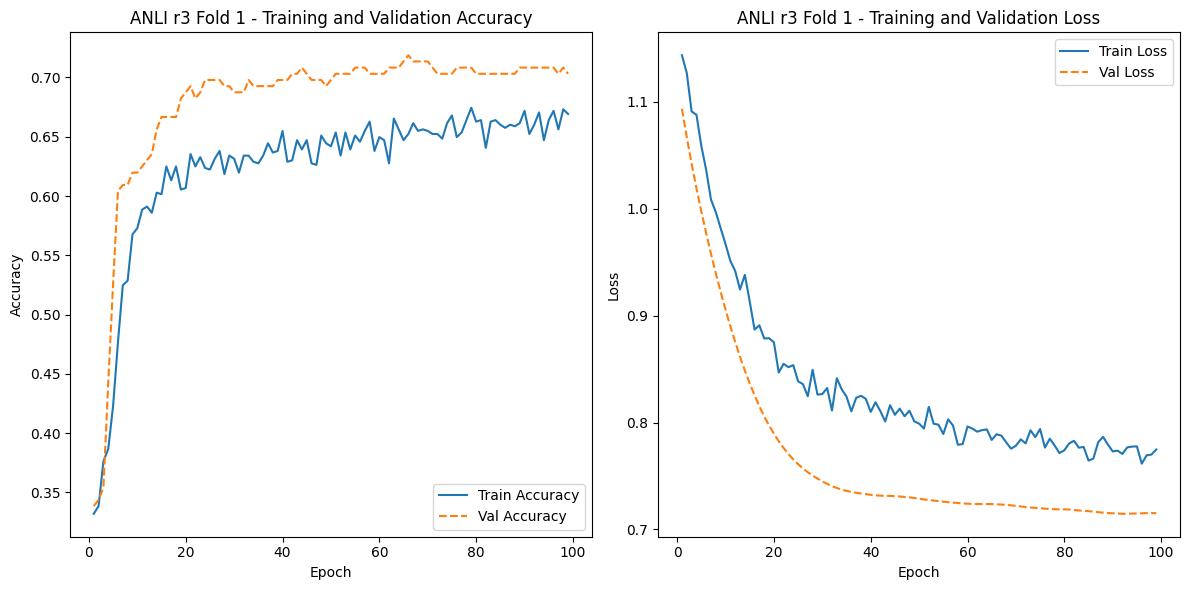

Epoch 1/100, Train Loss: 1.2360, Val Loss: 1.1819, Val Accuracy: 0.2031
Epoch 2/100, Train Loss: 1.2148, Val Loss: 1.1563, Val Accuracy: 0.2135
Epoch 3/100, Train Loss: 1.1772, Val Loss: 1.1323, Val Accuracy: 0.2188
Epoch 4/100, Train Loss: 1.1479, Val Loss: 1.1098, Val Accuracy: 0.2500
Epoch 5/100, Train Loss: 1.1306, Val Loss: 1.0887, Val Accuracy: 0.3958
Epoch 6/100, Train Loss: 1.1013, Val Loss: 1.0687, Val Accuracy: 0.4531
Epoch 7/100, Train Loss: 1.0734, Val Loss: 1.0500, Val Accuracy: 0.5208
Epoch 8/100, Train Loss: 1.0512, Val Loss: 1.0322, Val Accuracy: 0.5729
Epoch 9/100, Train Loss: 1.0463, Val Loss: 1.0155, Val Accuracy: 0.5885
Epoch 10/100, Train Loss: 1.0110, Val Loss: 0.9999, Val Accuracy: 0.5990
Epoch 11/100, Train Loss: 0.9928, Val Loss: 0.9850, Val Accuracy: 0.6042
Epoch 12/100, Train Loss: 0.9908, Val Loss: 0.9711, Val Accuracy: 0.6198
Epoch 13/100, Train Loss: 0.9604, Val Loss: 0.9577, Val Accuracy: 0.6250
Epoch 14/100, Train Loss: 0.9476, Val Loss: 0.9452, Val Accu

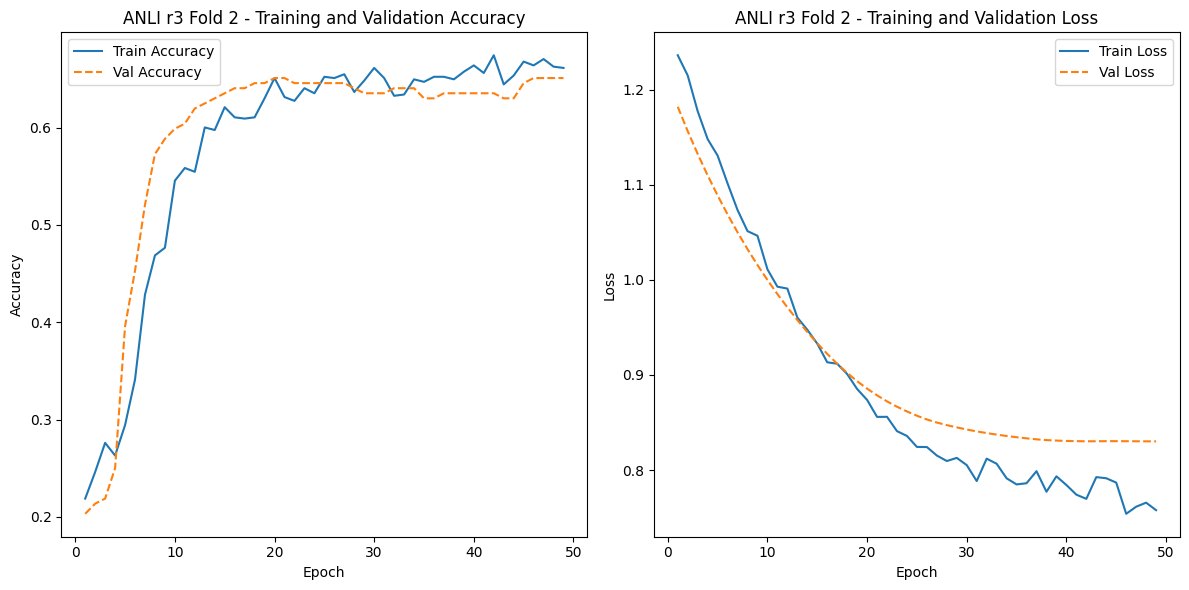

Epoch 1/100, Train Loss: 1.1338, Val Loss: 1.0670, Val Accuracy: 0.4323
Epoch 2/100, Train Loss: 1.1126, Val Loss: 1.0424, Val Accuracy: 0.5000
Epoch 3/100, Train Loss: 1.0885, Val Loss: 1.0205, Val Accuracy: 0.5417
Epoch 4/100, Train Loss: 1.0556, Val Loss: 1.0007, Val Accuracy: 0.5573
Epoch 5/100, Train Loss: 1.0252, Val Loss: 0.9826, Val Accuracy: 0.5729
Epoch 6/100, Train Loss: 1.0144, Val Loss: 0.9660, Val Accuracy: 0.5625
Epoch 7/100, Train Loss: 1.0021, Val Loss: 0.9506, Val Accuracy: 0.5677
Epoch 8/100, Train Loss: 0.9838, Val Loss: 0.9364, Val Accuracy: 0.5990
Epoch 9/100, Train Loss: 0.9803, Val Loss: 0.9232, Val Accuracy: 0.6354
Epoch 10/100, Train Loss: 0.9597, Val Loss: 0.9107, Val Accuracy: 0.6458
Epoch 11/100, Train Loss: 0.9422, Val Loss: 0.8992, Val Accuracy: 0.6562
Epoch 12/100, Train Loss: 0.9230, Val Loss: 0.8882, Val Accuracy: 0.6510
Epoch 13/100, Train Loss: 0.9126, Val Loss: 0.8778, Val Accuracy: 0.6510
Epoch 14/100, Train Loss: 0.9041, Val Loss: 0.8680, Val Accu

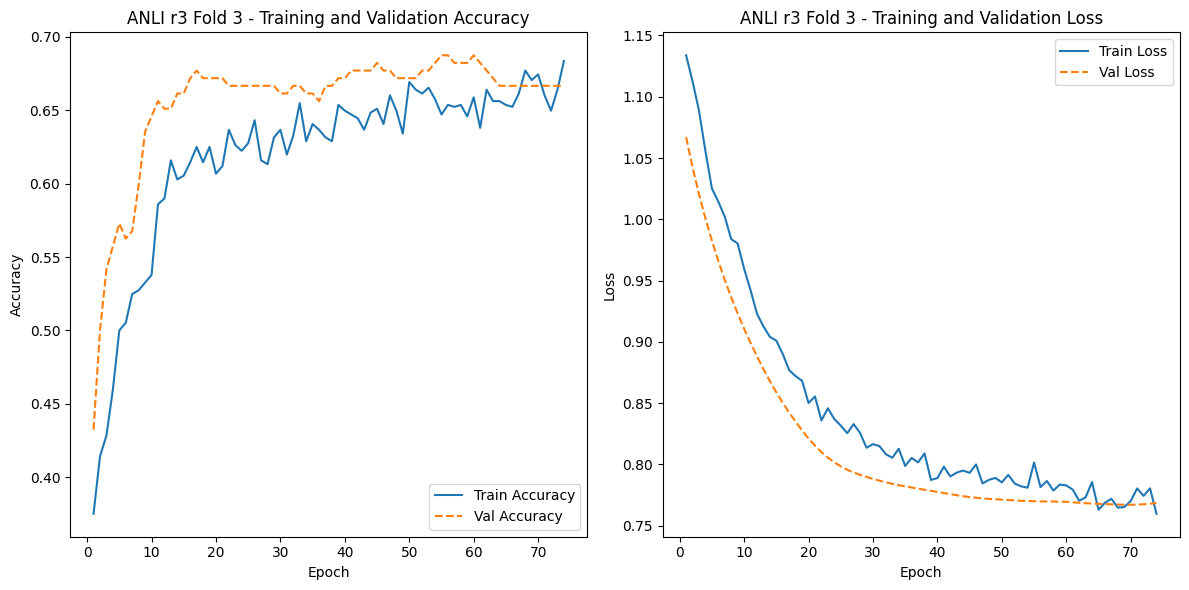

Epoch 1/100, Train Loss: 1.2027, Val Loss: 1.1469, Val Accuracy: 0.2448
Epoch 2/100, Train Loss: 1.1899, Val Loss: 1.1209, Val Accuracy: 0.2500
Epoch 3/100, Train Loss: 1.1372, Val Loss: 1.0964, Val Accuracy: 0.2969
Epoch 4/100, Train Loss: 1.1149, Val Loss: 1.0733, Val Accuracy: 0.3802
Epoch 5/100, Train Loss: 1.0837, Val Loss: 1.0516, Val Accuracy: 0.4271
Epoch 6/100, Train Loss: 1.0620, Val Loss: 1.0313, Val Accuracy: 0.4688
Epoch 7/100, Train Loss: 1.0406, Val Loss: 1.0120, Val Accuracy: 0.5573
Epoch 8/100, Train Loss: 1.0261, Val Loss: 0.9937, Val Accuracy: 0.5781
Epoch 9/100, Train Loss: 0.9931, Val Loss: 0.9766, Val Accuracy: 0.5833
Epoch 10/100, Train Loss: 0.9832, Val Loss: 0.9607, Val Accuracy: 0.5781
Epoch 11/100, Train Loss: 0.9697, Val Loss: 0.9458, Val Accuracy: 0.5729
Epoch 12/100, Train Loss: 0.9628, Val Loss: 0.9320, Val Accuracy: 0.5729
Epoch 13/100, Train Loss: 0.9317, Val Loss: 0.9191, Val Accuracy: 0.5833
Epoch 14/100, Train Loss: 0.9128, Val Loss: 0.9071, Val Accu

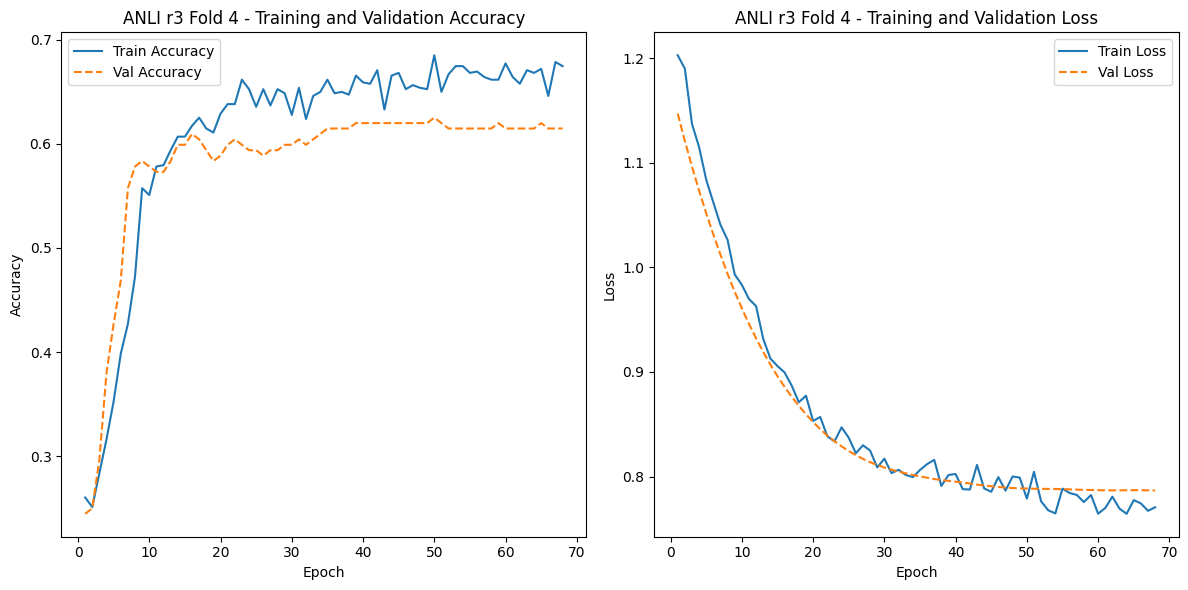

Epoch 1/100, Train Loss: 1.1778, Val Loss: 1.1249, Val Accuracy: 0.3958
Epoch 2/100, Train Loss: 1.1472, Val Loss: 1.1029, Val Accuracy: 0.4271
Epoch 3/100, Train Loss: 1.1399, Val Loss: 1.0825, Val Accuracy: 0.4792
Epoch 4/100, Train Loss: 1.1109, Val Loss: 1.0637, Val Accuracy: 0.5052
Epoch 5/100, Train Loss: 1.0883, Val Loss: 1.0460, Val Accuracy: 0.5365
Epoch 6/100, Train Loss: 1.0590, Val Loss: 1.0293, Val Accuracy: 0.5573
Epoch 7/100, Train Loss: 1.0432, Val Loss: 1.0138, Val Accuracy: 0.5625
Epoch 8/100, Train Loss: 1.0229, Val Loss: 0.9993, Val Accuracy: 0.5521
Epoch 9/100, Train Loss: 1.0117, Val Loss: 0.9858, Val Accuracy: 0.5677
Epoch 10/100, Train Loss: 0.9816, Val Loss: 0.9736, Val Accuracy: 0.5938
Epoch 11/100, Train Loss: 0.9706, Val Loss: 0.9622, Val Accuracy: 0.6198
Epoch 12/100, Train Loss: 0.9601, Val Loss: 0.9512, Val Accuracy: 0.6354
Epoch 13/100, Train Loss: 0.9596, Val Loss: 0.9409, Val Accuracy: 0.6719
Epoch 14/100, Train Loss: 0.9380, Val Loss: 0.9311, Val Accu

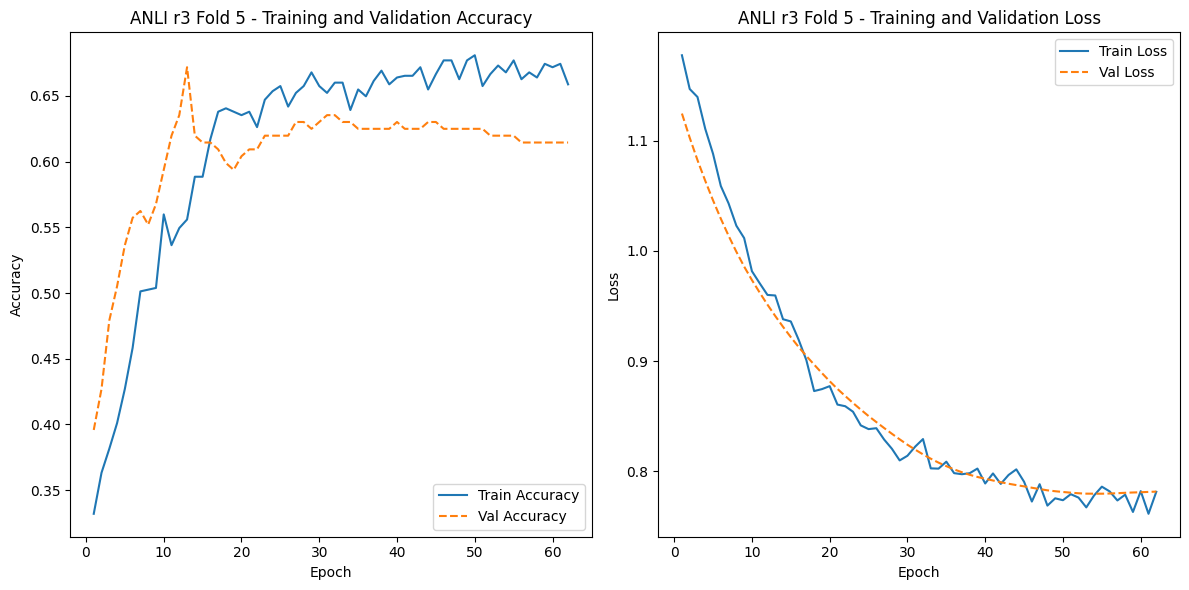

Average Validation Loss for ANLI r3 across 5 folds: 0.7764
Average Validation Accuracy for ANLI r3 across 5 folds: 0.6500


In [43]:
# Task: ANLI r3
task_name = 'ANLI r3'
X_train = X_train_anli_r3
y_train = y_train_anli_r3
avg_val_loss_anli_r3, avg_val_accuracy_anli_r3 = cross_validate(task_name, X_train, y_train)

Epoch 1/100, Train Loss: 1.1352, Val Loss: 1.0621, Val Accuracy: 0.3791
Epoch 2/100, Train Loss: 1.0832, Val Loss: 1.0147, Val Accuracy: 0.3826
Epoch 3/100, Train Loss: 1.0376, Val Loss: 0.9705, Val Accuracy: 0.3946
Epoch 4/100, Train Loss: 0.9914, Val Loss: 0.9287, Val Accuracy: 0.6150
Epoch 5/100, Train Loss: 0.9506, Val Loss: 0.8890, Val Accuracy: 0.8600
Epoch 6/100, Train Loss: 0.9127, Val Loss: 0.8512, Val Accuracy: 0.8753
Epoch 7/100, Train Loss: 0.8707, Val Loss: 0.8149, Val Accuracy: 0.8820
Epoch 8/100, Train Loss: 0.8361, Val Loss: 0.7800, Val Accuracy: 0.8854
Epoch 9/100, Train Loss: 0.8020, Val Loss: 0.7467, Val Accuracy: 0.8856


/tmp/ipykernel_34/3613549310.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 10/100, Train Loss: 0.7675, Val Loss: 0.7149, Val Accuracy: 0.8870
Epoch 11/100, Train Loss: 0.7386, Val Loss: 0.6844, Val Accuracy: 0.8870
Epoch 12/100, Train Loss: 0.7084, Val Loss: 0.6550, Val Accuracy: 0.8881
Epoch 13/100, Train Loss: 0.6808, Val Loss: 0.6269, Val Accuracy: 0.8891
Epoch 14/100, Train Loss: 0.6529, Val Loss: 0.6001, Val Accuracy: 0.8915
Epoch 15/100, Train Loss: 0.6276, Val Loss: 0.5745, Val Accuracy: 0.8919
Epoch 16/100, Train Loss: 0.6017, Val Loss: 0.5505, Val Accuracy: 0.8925
Epoch 17/100, Train Loss: 0.5781, Val Loss: 0.5278, Val Accuracy: 0.8936
Epoch 18/100, Train Loss: 0.5569, Val Loss: 0.5065, Val Accuracy: 0.8942
Epoch 19/100, Train Loss: 0.5361, Val Loss: 0.4865, Val Accuracy: 0.8942
Epoch 20/100, Train Loss: 0.5198, Val Loss: 0.4680, Val Accuracy: 0.8948
Epoch 21/100, Train Loss: 0.5011, Val Loss: 0.4510, Val Accuracy: 0.8963
Epoch 22/100, Train Loss: 0.4820, Val Loss: 0.4350, Val Accuracy: 0.8975
Epoch 23/100, Train Loss: 0.4685, Val Loss: 0.4203,

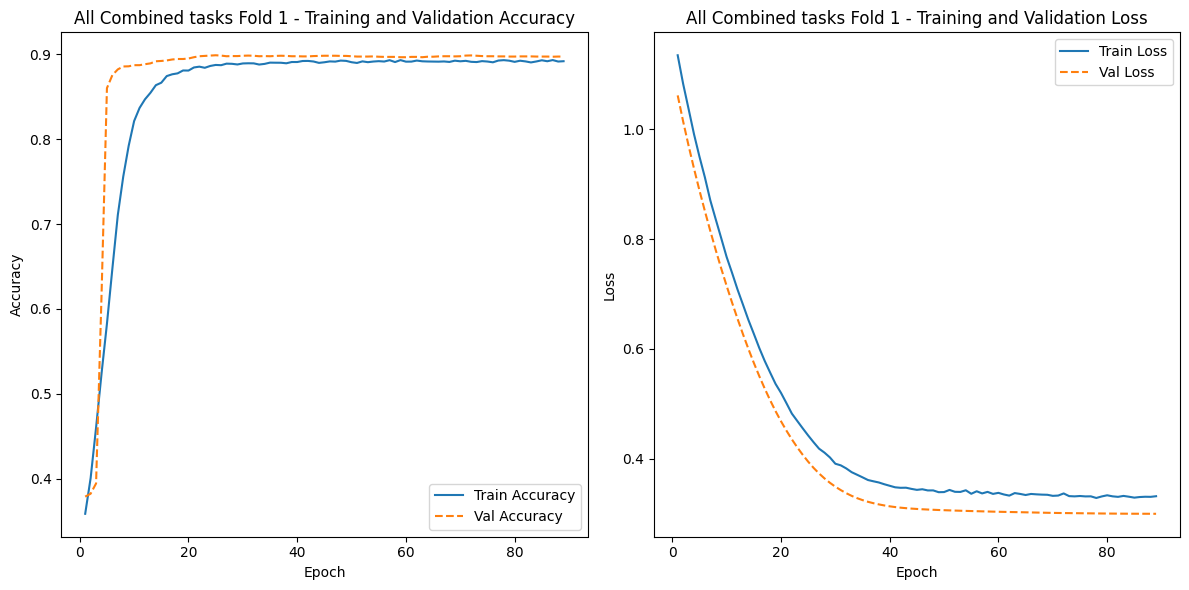

Epoch 1/100, Train Loss: 1.2216, Val Loss: 1.1464, Val Accuracy: 0.3187
Epoch 2/100, Train Loss: 1.1632, Val Loss: 1.0916, Val Accuracy: 0.5194
Epoch 3/100, Train Loss: 1.1077, Val Loss: 1.0406, Val Accuracy: 0.5793
Epoch 4/100, Train Loss: 1.0567, Val Loss: 0.9939, Val Accuracy: 0.5936
Epoch 5/100, Train Loss: 1.0098, Val Loss: 0.9498, Val Accuracy: 0.6007
Epoch 6/100, Train Loss: 0.9655, Val Loss: 0.9080, Val Accuracy: 0.6057
Epoch 7/100, Train Loss: 0.9255, Val Loss: 0.8685, Val Accuracy: 0.6244
Epoch 8/100, Train Loss: 0.8841, Val Loss: 0.8316, Val Accuracy: 0.8515
Epoch 9/100, Train Loss: 0.8494, Val Loss: 0.7966, Val Accuracy: 0.8655
Epoch 10/100, Train Loss: 0.8155, Val Loss: 0.7633, Val Accuracy: 0.8718
Epoch 11/100, Train Loss: 0.7826, Val Loss: 0.7316, Val Accuracy: 0.8766
Epoch 12/100, Train Loss: 0.7512, Val Loss: 0.7014, Val Accuracy: 0.8795
Epoch 13/100, Train Loss: 0.7199, Val Loss: 0.6727, Val Accuracy: 0.8827
Epoch 14/100, Train Loss: 0.6932, Val Loss: 0.6454, Val Accu

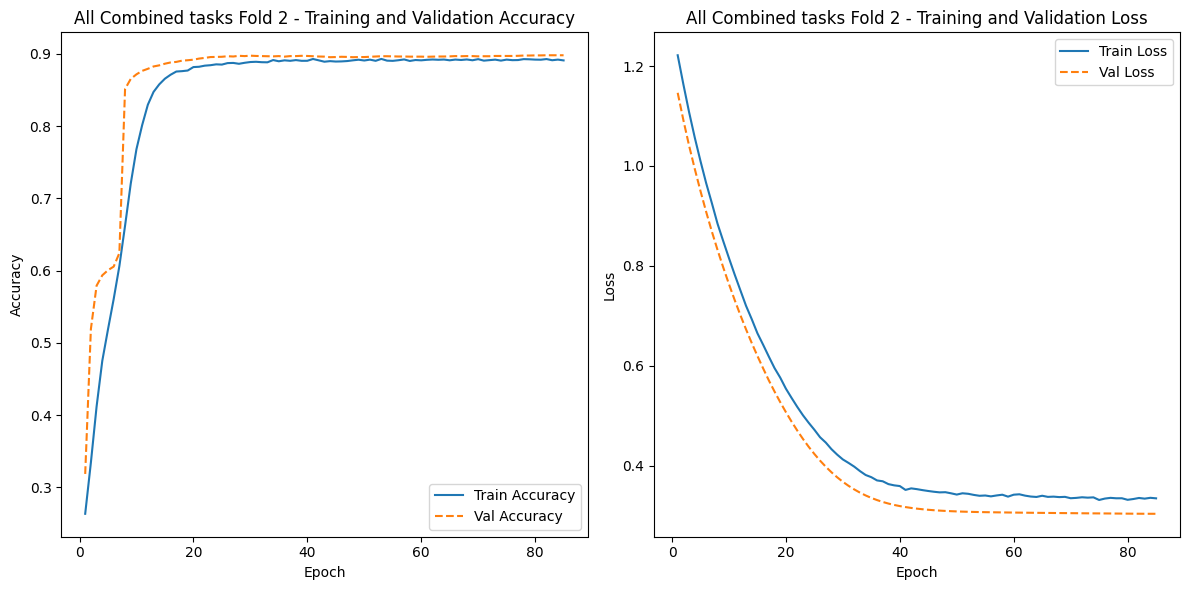

Epoch 1/100, Train Loss: 0.9443, Val Loss: 0.8924, Val Accuracy: 0.8611
Epoch 2/100, Train Loss: 0.9029, Val Loss: 0.8510, Val Accuracy: 0.8789
Epoch 3/100, Train Loss: 0.8619, Val Loss: 0.8109, Val Accuracy: 0.8864
Epoch 4/100, Train Loss: 0.8263, Val Loss: 0.7721, Val Accuracy: 0.8869
Epoch 5/100, Train Loss: 0.7835, Val Loss: 0.7345, Val Accuracy: 0.8879
Epoch 6/100, Train Loss: 0.7502, Val Loss: 0.6983, Val Accuracy: 0.8885
Epoch 7/100, Train Loss: 0.7139, Val Loss: 0.6634, Val Accuracy: 0.8888
Epoch 8/100, Train Loss: 0.6809, Val Loss: 0.6302, Val Accuracy: 0.8896
Epoch 9/100, Train Loss: 0.6474, Val Loss: 0.5994, Val Accuracy: 0.8896
Epoch 10/100, Train Loss: 0.6194, Val Loss: 0.5703, Val Accuracy: 0.8887
Epoch 11/100, Train Loss: 0.5915, Val Loss: 0.5426, Val Accuracy: 0.8894
Epoch 12/100, Train Loss: 0.5657, Val Loss: 0.5164, Val Accuracy: 0.8890
Epoch 13/100, Train Loss: 0.5402, Val Loss: 0.4917, Val Accuracy: 0.8898
Epoch 14/100, Train Loss: 0.5152, Val Loss: 0.4689, Val Accu

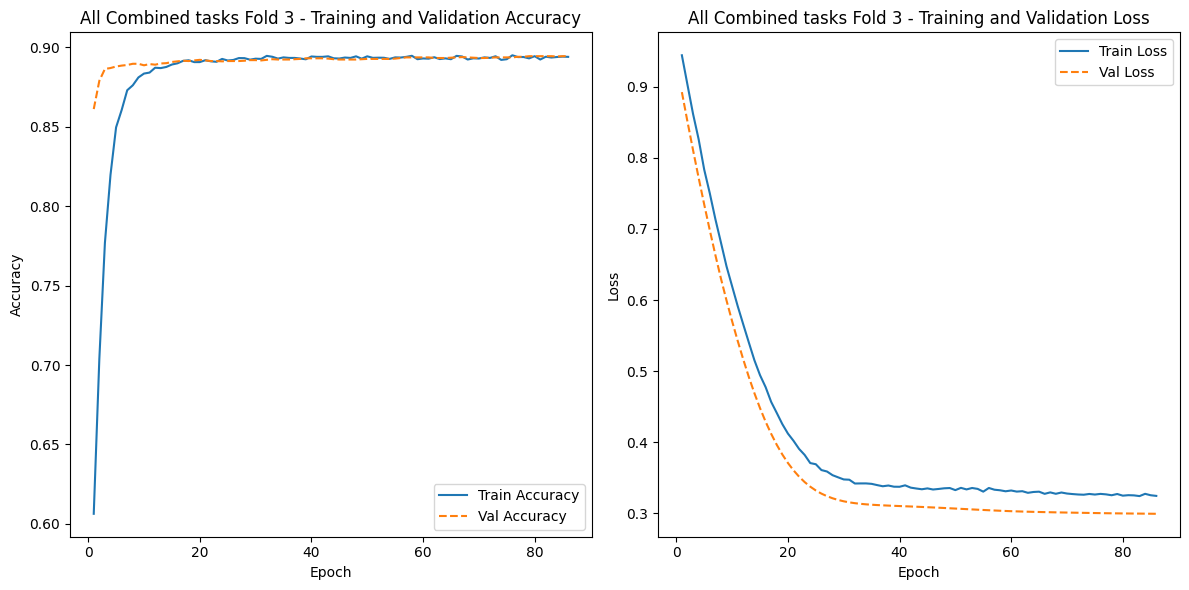

Epoch 1/100, Train Loss: 1.1295, Val Loss: 1.0601, Val Accuracy: 0.3256
Epoch 2/100, Train Loss: 1.0844, Val Loss: 1.0137, Val Accuracy: 0.3283
Epoch 3/100, Train Loss: 1.0325, Val Loss: 0.9692, Val Accuracy: 0.5919
Epoch 4/100, Train Loss: 0.9910, Val Loss: 0.9264, Val Accuracy: 0.8249
Epoch 5/100, Train Loss: 0.9444, Val Loss: 0.8856, Val Accuracy: 0.8523
Epoch 6/100, Train Loss: 0.9065, Val Loss: 0.8471, Val Accuracy: 0.8655
Epoch 7/100, Train Loss: 0.8666, Val Loss: 0.8108, Val Accuracy: 0.8735
Epoch 8/100, Train Loss: 0.8275, Val Loss: 0.7758, Val Accuracy: 0.8793
Epoch 9/100, Train Loss: 0.7958, Val Loss: 0.7419, Val Accuracy: 0.8825
Epoch 10/100, Train Loss: 0.7633, Val Loss: 0.7089, Val Accuracy: 0.8844
Epoch 11/100, Train Loss: 0.7305, Val Loss: 0.6768, Val Accuracy: 0.8852
Epoch 12/100, Train Loss: 0.6984, Val Loss: 0.6453, Val Accuracy: 0.8869
Epoch 13/100, Train Loss: 0.6670, Val Loss: 0.6147, Val Accuracy: 0.8877
Epoch 14/100, Train Loss: 0.6375, Val Loss: 0.5856, Val Accu

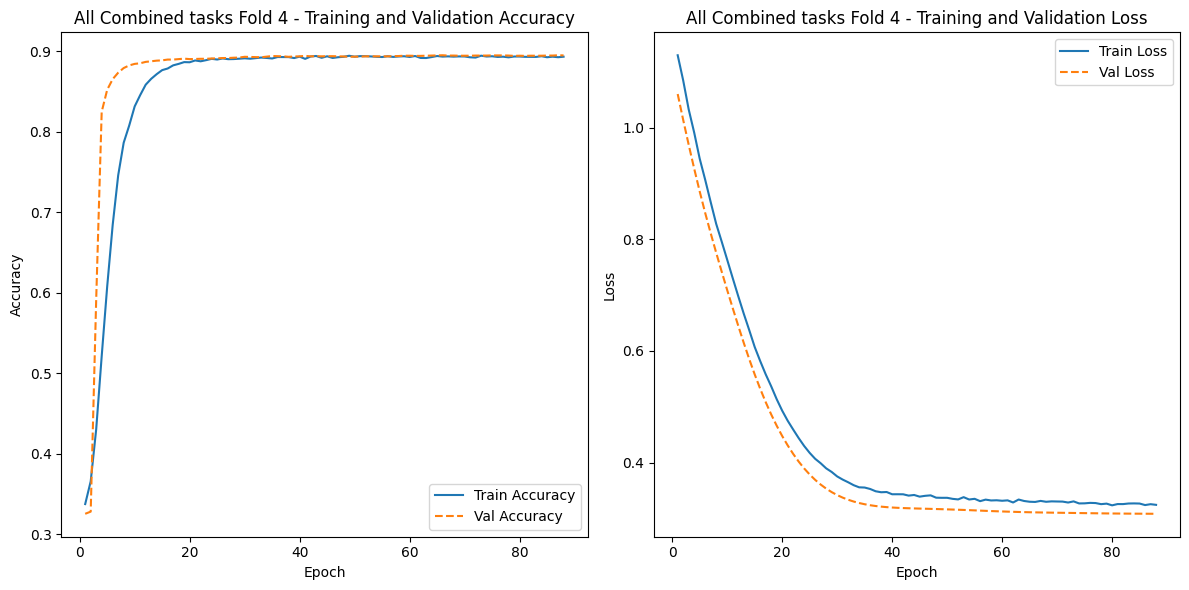

Epoch 1/100, Train Loss: 1.1803, Val Loss: 1.1186, Val Accuracy: 0.1012
Epoch 2/100, Train Loss: 1.1277, Val Loss: 1.0688, Val Accuracy: 0.3537
Epoch 3/100, Train Loss: 1.0770, Val Loss: 1.0219, Val Accuracy: 0.3692
Epoch 4/100, Train Loss: 1.0300, Val Loss: 0.9791, Val Accuracy: 0.3935
Epoch 5/100, Train Loss: 0.9874, Val Loss: 0.9400, Val Accuracy: 0.4894
Epoch 6/100, Train Loss: 0.9494, Val Loss: 0.9025, Val Accuracy: 0.6436
Epoch 7/100, Train Loss: 0.9106, Val Loss: 0.8668, Val Accuracy: 0.6480
Epoch 8/100, Train Loss: 0.8745, Val Loss: 0.8330, Val Accuracy: 0.6688
Epoch 9/100, Train Loss: 0.8410, Val Loss: 0.8010, Val Accuracy: 0.8527
Epoch 10/100, Train Loss: 0.8092, Val Loss: 0.7701, Val Accuracy: 0.8657
Epoch 11/100, Train Loss: 0.7799, Val Loss: 0.7401, Val Accuracy: 0.8718
Epoch 12/100, Train Loss: 0.7495, Val Loss: 0.7112, Val Accuracy: 0.8747
Epoch 13/100, Train Loss: 0.7224, Val Loss: 0.6834, Val Accuracy: 0.8766
Epoch 14/100, Train Loss: 0.6932, Val Loss: 0.6566, Val Accu

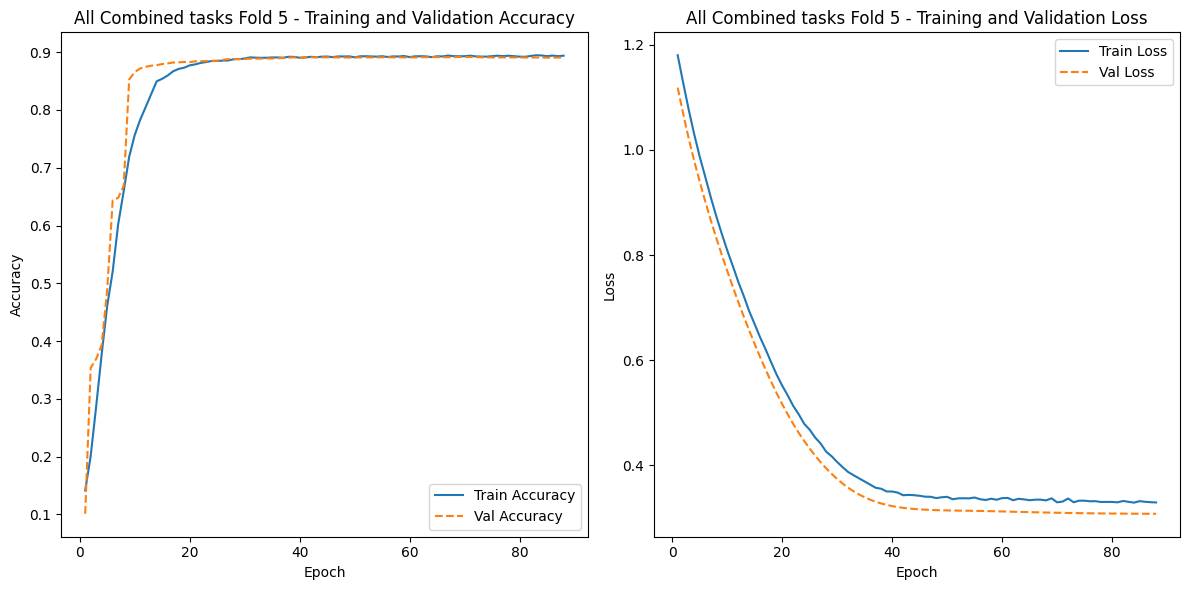

Average Validation Loss for All Combined tasks across 5 folds: 0.3035
Average Validation Accuracy for All Combined tasks across 5 folds: 0.8951


In [44]:
# Task: ANLI r3
task_name = 'All Combined tasks'
X_train = X_train_all
y_train = y_train_all
avg_val_loss_all, avg_val_accuracy_all = cross_validate(task_name, X_train, y_train)


NameError: name 'train_accuracies' is not defined

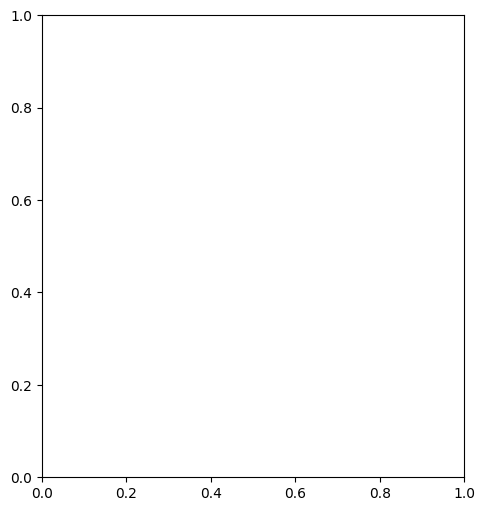

In [45]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Training and validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

# Training and validation loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()